In [2]:
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

C:\Users\pc\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Loading Data Set

In [3]:
df = pd.read_excel(r"C:\Users\pc\Downloads\data (1).xlsx")

In [4]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [6]:
df.describe()


ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# Duplicates

In [9]:
df.duplicated().sum()

0

# Dropping columns and Rows

In [10]:
df= df.drop(['Unnamed: 0','ID','10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID','CollegeCityID', 'CollegeCityTier' ], axis = 1)

In [11]:
df.drop(df[df['Designation']=='get'].index,inplace=True)

In [12]:
df.drop(df[df['GraduationYear']== 0].index,inplace=True)

# Data Cleaning

In [13]:
df['JobCity'] = df['JobCity'].str.upper()
df['JobCity'] = df['JobCity'].str.strip()

In [14]:
choices = ['BANGALORE',"INDORE","CHENNAI",'GURGAON', 'HYDERABAD','NOIDA', 'KOLKATA', 'PUNE','MOHALI', 'JHANSI','NEW DELHI',
           'BHUBANESWAR', 'MUMBAI', 'MANGALORE', 'REWARI', 'GHAZIABAD','BHIWADI','MYSORE', 'RAJKOT', 'JAIPUR', 'THANE',
          'MAHARAJGANJ','THIRUVANANTHAPURAM','PANCHKULA','COIMBATORE', 'DHANBAD', 'LUCKNOW', 'GANDHI NAGAR',
       'DAMAN AND DIU', 'NAGPUR', 'BHAGALPUR','AHMEDABAD', 'KOCHI', 'BANKURA', 'KANPUR', 'VIJAYAWADA', 'BEAWAR', 'ALWAR',
       'SILIGURI', 'RAIPUR', 'BHOPAL', 'JODHPUR', 'UDAIPUR','MUZAFFARPUR', 'BULANDSHAHAR', 'HARIDWAR', 'RAIGARH','VISAKHAPATNAM',
        'JABALPUR', 'UNNAO', 'FARIDABAD', 'AURANGABAD','BELGAUM', 'DEHRADUN', 'RUDRAPUR', 'JAMSHEDPUR','DHARAMSHALA','HISSAR', 'RANCHI', 
'MADURAI','CHANDIGARH', 'AUSTRALIA', 'CHEYYAR', 'SONEPAT',
       'PANTNAGAR', 'JAGDALPUR', 'ANGUL', 'BARODA',
       'ARIYALUR', 'JOWAI',
       'NEEMRANA', 'TIRUPATI',
       'DUBAI', 'AHMEDNAGAR', 'NASHIK', 'BALLARI', 'LUDHIANA',
       'MUZAFFARNAGAR', 'GAGRET','GWALIOR',
       'SONIPAT', 'BAREILLY', 'HOSPET',
       'MIRYALAGUDA', 'DHARUHERA', 'MEERUT', 'GANJAM', 'HUBLI', 'NCR',
       'AGRA', 'TRICHY', 'KUDANKULAM ,TARAPUR', 'ONGOLE', 'SAMBALPUR',
       'PONDICHERRY', 'BUNDI', 'SADULPUR',
       'BIKANER', 'VADODARA', 'ASANSOL', 'TIRUNELVELI',
       'ERNAKULAM', 'BILASPUR', 'CHANDRAPUR', 'NANDED', 'DHARMAPURI',
       'VANDAVASI', 'ROHTAK', 'PATNA', 'SALEM',
       'BHARUCH', 'TORNAGALLU', 'JASPUR',
       'BURDWAN', 'SHIMLA','JAMMU', 'SHAHDOL',
       'MUVATTUPUZHA', 'AL JUBAIL', 'KALMAR',
       'SECUNDERABAD', 'RATNAGIRI', 'JHAJJAR',
       'GULBARGA', 'NALAGARH',
       'JEDDAH', 'JAMNAGAR',
       'GONDA', 'ORISSA',
       'JOSHIMATH', 'BATHINDA', 'JOHANNESBURG', 'KALA AMB', 'KARNAL',
       'LONDON', 'KOTA', 'BADDI', 'NAGARI',
       'METTUR', 'DURGAPUR', 'PONDI', 'SURAT', 'KURNOOL',
       'KOLHAPUR', 'BHILAI', 'BAHADURGARH',
       'RAYAGADA', 'KAKINADA', 'VARANASI', 'NELLORE',
       'HOWRAH', 'TRICHUR', 'AMBALA', 'KHOPOLI', 'ROORKEE',
       'ALLAHABAD', 'JALANDHAR', 'MANESAR', 'VAPI', 'PILANI',
       'RAS AL KHAIMAH', 'SINGARULI',
       'PHAGWARA', 'BARIPADA', 'YAMUNA NAGAR', 'SHAHIBABAD',
       'SAMPLA', 'GUWAHATI', 'ROURKELA', 'VELLORE', 'DAUSA',
       'LATUR', 'MAINPURI', 'DAMMAM', 'HALDIA',
       'RAE BARELI', 'PATIALA', 'GORAKHPUR', 'AMBALA CITY',
       'KARAD', 'RAJPURA']

In [15]:
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [16]:
df['JobCity'] = df['JobCity'].apply(lambda i : correct_spelling_errors(str(i), choices))

In [17]:
df["JobCity"] = df["JobCity"].replace("BENGALURU","BANGALORE", regex = False)

In [18]:
choices = [
       'electronics and communication engineering',
       'information technology', 'computer science and engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engineering',
       'computer science and technology', 'mechatronics',
       'automobile/automotive engineering', 'polymer technology',
       'mechanical & production engineering',
       'power systems and automation', 'instrumentation engineering',
       'telecommunication engineering',
       'industrial & management engineering', 'industrial engineering',
       'computer and communication engineering',
       'information & communication technology', 
       'internal combustion engine', 'computer networking',
       'biomedical engineering']

In [19]:
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [20]:
df['Specialization'] = df['Specialization'].apply(lambda i : correct_spelling_errors(str(i), choices))

In [21]:
df['DOL'] = df['DOL'].replace('present', "2015-12-31" )

In [22]:
df['DOL'] = df['DOL'].astype('datetime64[ns]')

In [23]:
df["Total_Exp"] = df['DOL'].dt.year - dd['DOJ'].dt.year

In [24]:
df["Age"] = 2015 - df['DOB'].dt.year

In [25]:
df["Gender"] = df["Gender"].replace('female', "Female")
df["Gender"] = df["Gender"].replace('male', "Male")

In [26]:
df.drop(df[df['Total_Exp'] == 24].index, inplace = True)

In [27]:
df.drop(['DOB','DOJ','DOL'], axis = 1, inplace = True )

In [28]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Total_Exp', 'Age'],
      dtype='object')

# Typecasting

In [32]:
df.dtypes

Salary                     int64
Designation               object
JobCity                   object
Gender                    object
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Total_Exp                float64
Age                        int64
dtype: object

In [34]:
df['Salary'] = df['Salary'].astype('int32')
df['CollegeTier'] = df['CollegeTier'].astype('int8')
df['collegeGPA'] = df['collegeGPA'].astype('float16')
df['Domain'] = df['Domain'].astype('float16')
df['ComputerProgramming'] = df['ComputerProgramming'].astype('int16')
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].astype('int16')
df['ComputerScience'] = df['ComputerScience'].astype('int16')
df['MechanicalEngg'] = df['MechanicalEngg'].astype('int16')
df['ElectricalEngg'] = df['ElectricalEngg'].astype('int16')
df['TelecomEngg'] = df['TelecomEngg'].astype('int16')
df['CivilEngg'] = df['CivilEngg'].astype('int16')
df['Total_Exp'] = df['Total_Exp'].astype('int8')
df['Age'] = df['Age'].astype('int8')
df['conscientiousness'] = df['conscientiousness'].astype('float16')
df['agreeableness'] = df['agreeableness'].astype('float16')
df['extraversion'] = df['extraversion'].astype('float16')
df['nueroticism'] = df['nueroticism'].astype('float16')
df['openess_to_experience'] = df['openess_to_experience'].astype('float16')

In [35]:
df['GraduationYear'] = df['GraduationYear'].astype('int16')
df['English'] = df['English'].astype('int16')
df['Logical'] = df['Logical'].astype('int16')
df['Quant'] = df['Quant'].astype('int16')

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3982 non-null   int32  
 1   Designation            3982 non-null   object 
 2   JobCity                3982 non-null   object 
 3   Gender                 3982 non-null   object 
 4   CollegeTier            3982 non-null   int8   
 5   Degree                 3982 non-null   object 
 6   Specialization         3982 non-null   object 
 7   collegeGPA             3982 non-null   float16
 8   CollegeState           3982 non-null   object 
 9   GraduationYear         3982 non-null   int16  
 10  English                3982 non-null   int16  
 11  Logical                3982 non-null   int16  
 12  Quant                  3982 non-null   int16  
 13  Domain                 3982 non-null   float16
 14  ComputerProgramming    3982 non-null   int16  
 15  Elec

# Univariate Analysis

# UNI-VARIATE ANALYSIS ON SALARY


In [38]:
import plotly.express as px
fig = px.box(df['Salary'],orientation='h')
fig.show()

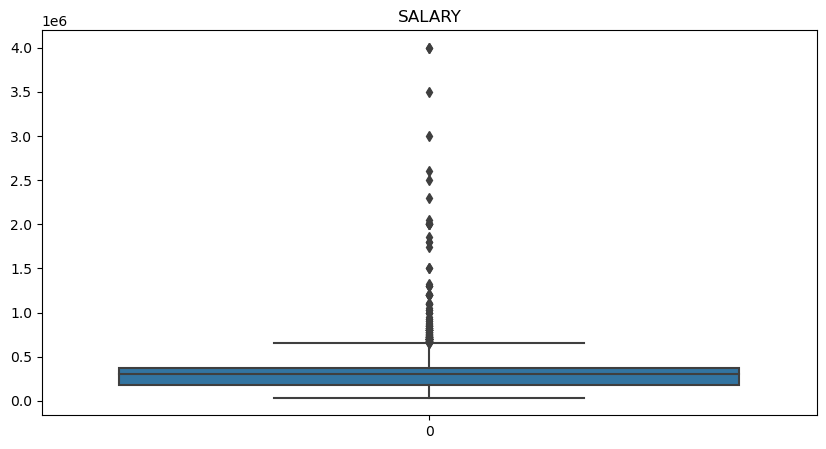

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Salary'])
plt.title('SALARY')
plt.show()

1  THE MOST OF THE SALARIES ARE RANGE BETWEEN 180000 TO 370000.

2  THE HIGHEST SALARY IS 40 LAKHS.

# UNI-VARIATE ANALYSIS ON  GRADUATION

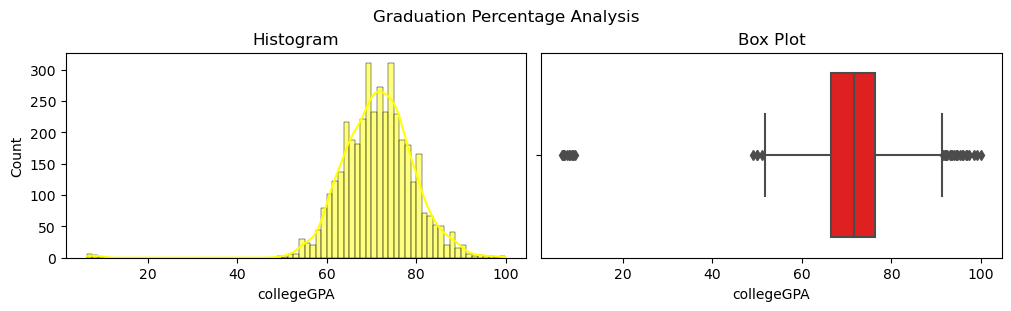

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Graduation Percentage Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='collegeGPA', kde = True, ax=axs[0], color = "yellow")

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='collegeGPA', ax=axs[1], color = 'red')

plt.show()

Candidates are high in number who secured percentage between 65-80, yet few candidates are found who extremely good percentage. Few are also found with extremely low percentage, but still they gained jobs.

# UNI-VARIATE ANALYSIS ON DEGREE

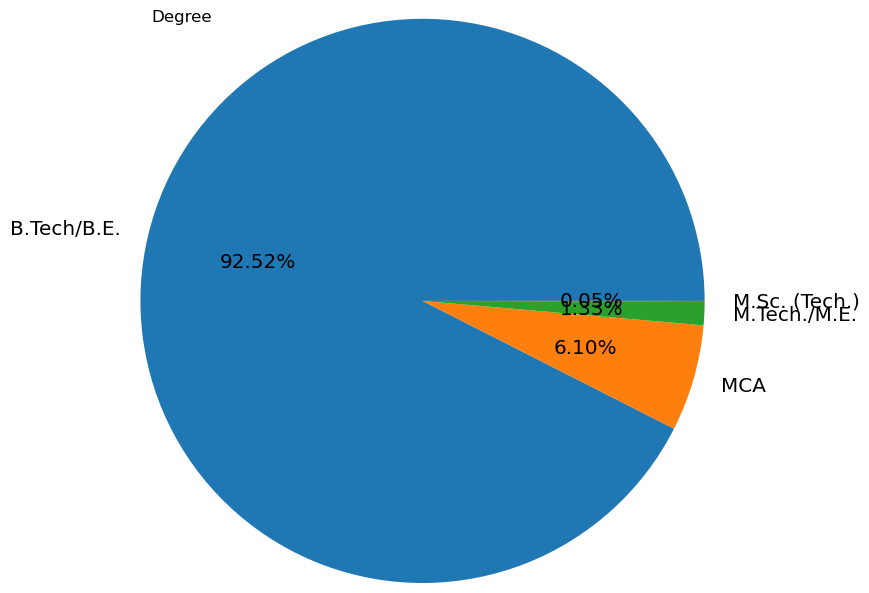

In [49]:
plt.figure(figsize=(7,8))
plt.pie(df['Degree'].value_counts(),labels=df['Degree'].value_counts().index,autopct='%.2f%%',textprops={'size': 'x-large'},radius=1.3)
plt.title('Degree',loc='left')
plt.show()

1  B.TECH/B.E STUDENTS ARE GIVING MORE df EXAM.

2  THE LEAST STUDENTS FROM M.SC GIVING df EXAM

# UNI-VARIATE ANALYSIS ON COLLEGE GPA

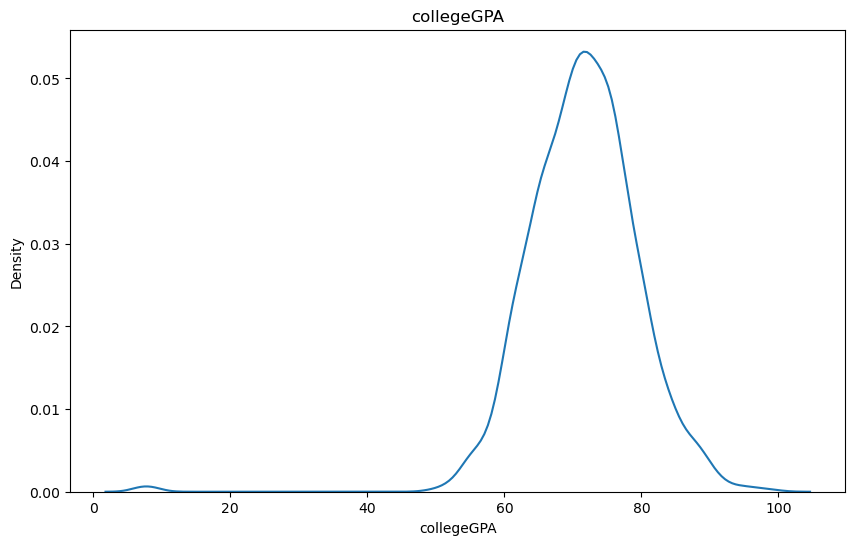

In [54]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['collegeGPA'])
plt.title('collegeGPA')
plt.show()

1  THE MOST OF COLLEGE GPA ARE RANGE BETWEEN 50 TO 80.

2  M2OST OF THE STUDENTS HAVE MORE COLLEGEGPA.

# UNI-VARIATE ANALYSIS ON GRADUATION YEAR¶

C:\Users\pc\AppData\Local\Temp\ipykernel_19184\4045005028.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




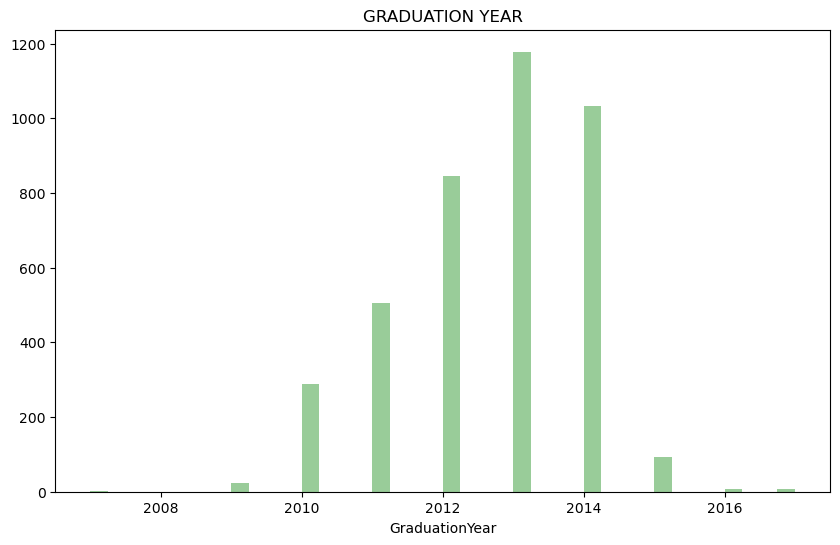

In [57]:
plt.figure(figsize=(10,6))
sns.distplot(df['GraduationYear'],kde=False,color='Green')
plt.title('GRADUATION YEAR')
plt.show()

1  THE MOST OF THE GRADUATES ARE FROM 2013 and 2014.

2  THE LEAST GRADUATES ARE FROM 2007.

# UNI-VARIATE ANALYSIS ON COLLEGE STATE

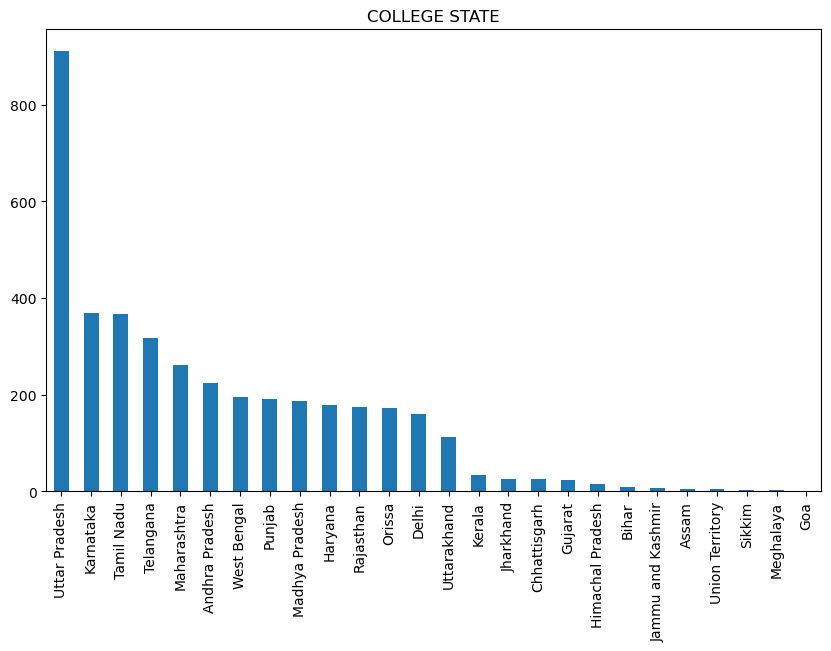

In [58]:
plt.figure(figsize=(10,6))
df['CollegeState'].value_counts().plot.bar()
plt.xticks(rotation=90,fontsize=10),
color = ('Blue')
plt.title('COLLEGE STATE')
plt.show()

1  THE MOST OF THE GRADUATES ARE FROM UTTAR PRADESH,KARNATAKA,TAMIL NADU AND TELANGANA.


2  THE LEAST OF THE GRADUATES ARE FROM GOA,MEGHALAYA AND SIKKIM.

# UNI-VARIATE ANALYSIS ON SPECIALIZATION¶

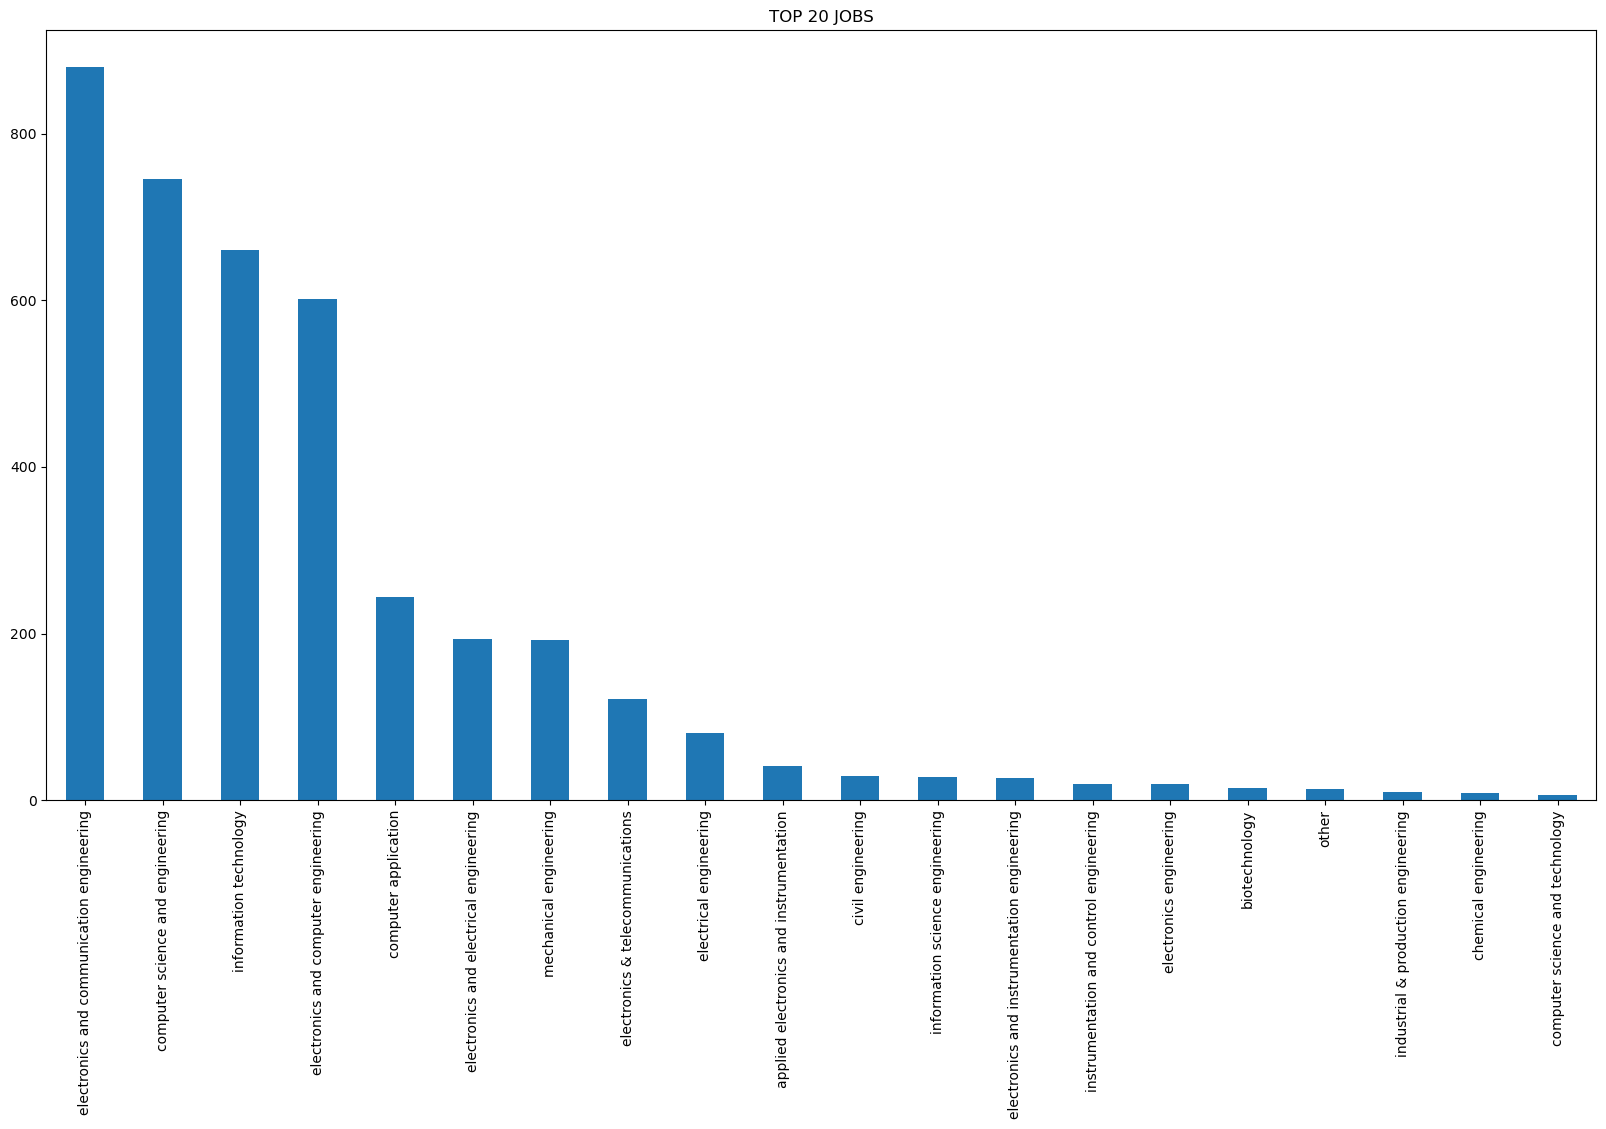

In [66]:
plt.figure(figsize=(20,10))
city=df['Specialization'].value_counts()[:20].plot.bar(),
plt.title('TOP 20 JOBS')
plt.show()

1 THE ELECTRONICS AND COMMUNICATION ENGINEERING ARE HIGHEST SPECIALIZATION.

2 THIS COUNT PLOT SHOWS THE COUNT OF THE SPECIALIZATION.

# UNI-VARIATE ANALYSIS ON ENGLISH

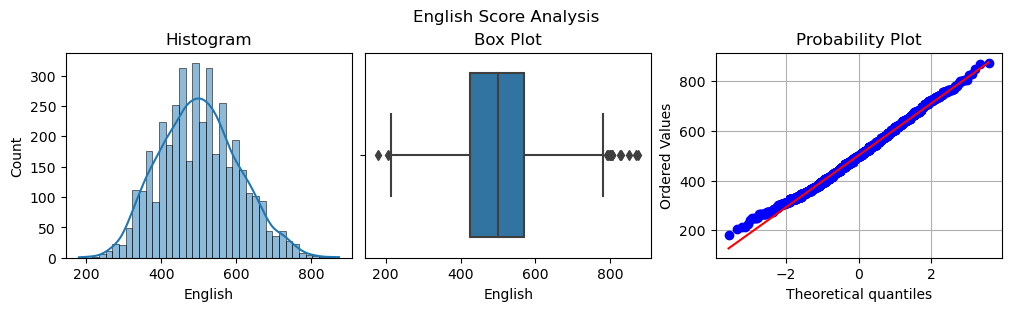

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("English Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='English', kde = True, ax=axs[0])

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='English', ax=axs[1])

stats.probplot(dd['English'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

Although there are few ouliers, English scores are normally distribuited with maximum candidates lying inside the whisker

# UNI-VARIATE ANALYSIS ON LOGICAL Score

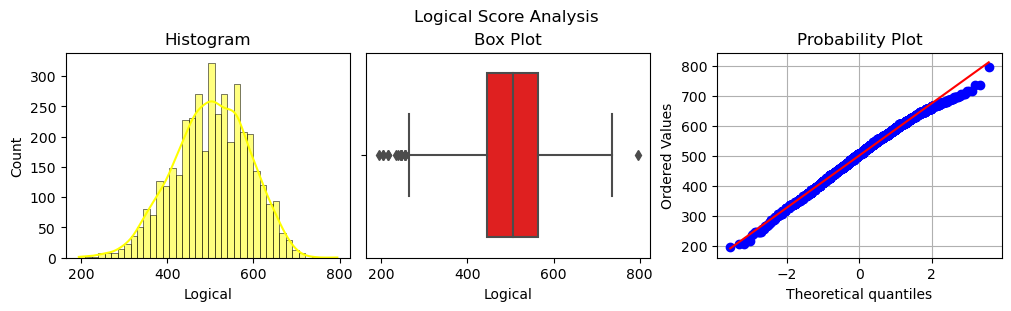

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Logical Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Logical', kde = True, ax=axs[0], color = 'yellow')

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='Logical', ax=axs[1], color = 'red')

stats.probplot(dd['Logical'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

Most of the candidates have scored marks between 250 and 700 making this a normal distributed data.

# UNI-VARIATE ANALYSIS ON QUANT

In [77]:
fig = px.box(df['Quant'],orientation='h')
fig.show()

1 THE MOST OF THE RANGE IS BETWEN 430 TO 595.

2 THE LEAST VALUE IS 120.

T3 HE HIGHEST VALUE IS 900.

# UNI-VARIATE ANALYSIS ON TOP 20 JOB-CITIES

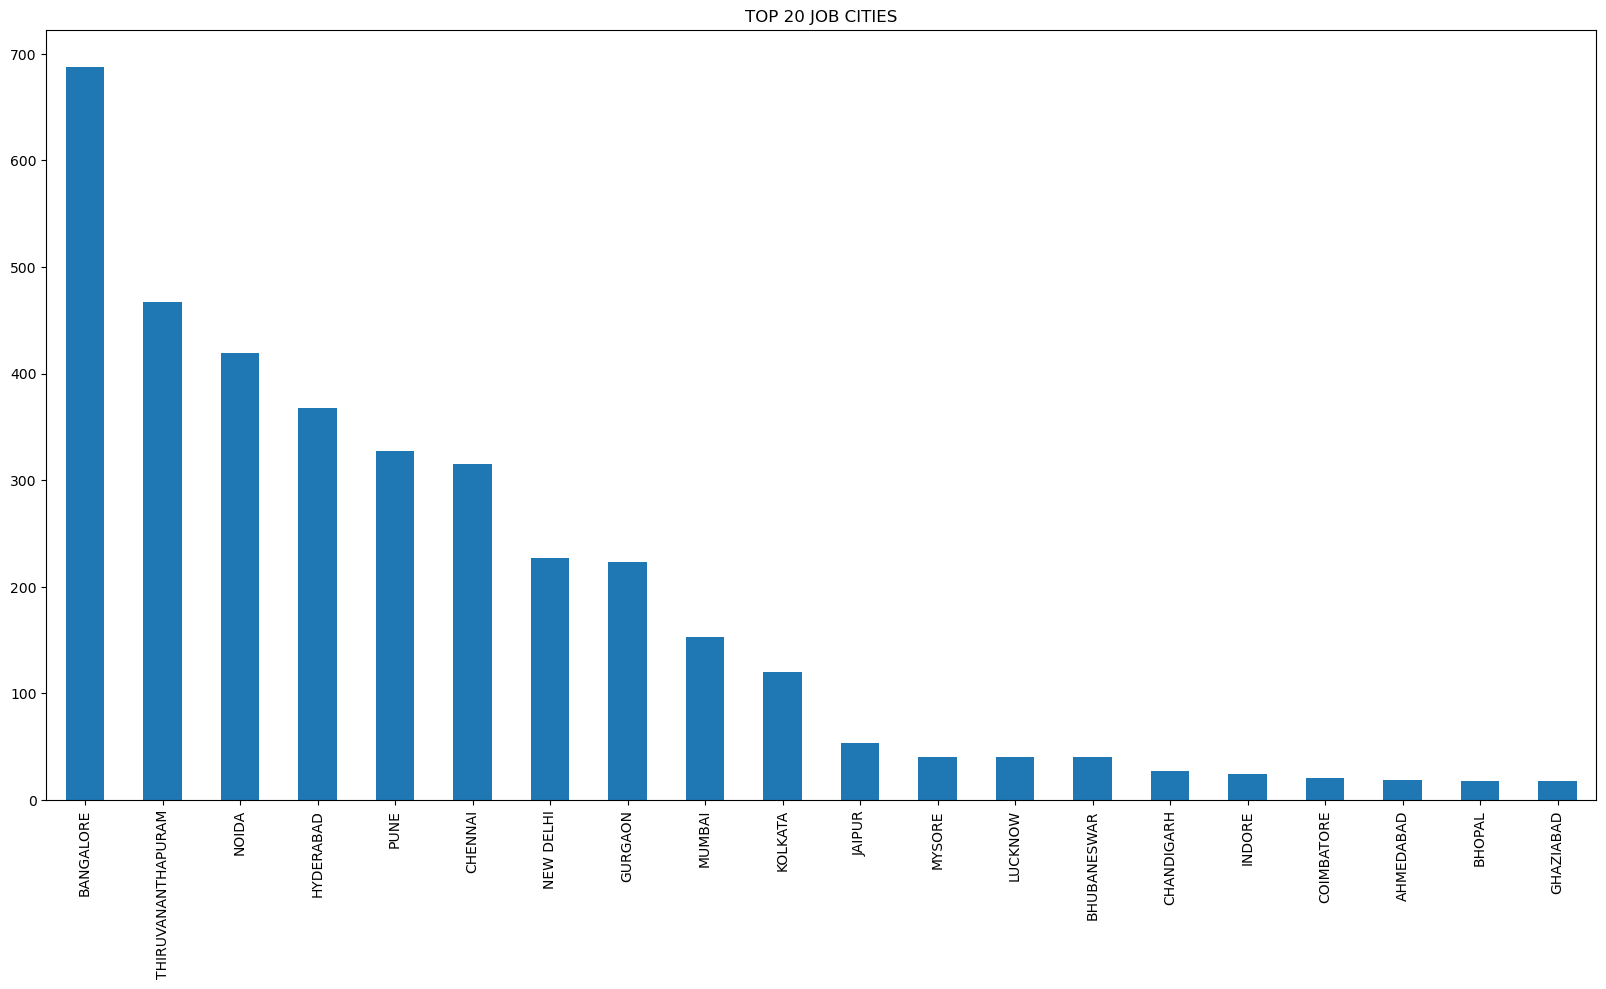

In [78]:
plt.figure(figsize=(20,10))
city=df['JobCity'].value_counts()[:20].plot.bar()
plt.title('TOP 20 JOB CITIES')
plt.show()

1 THIS ARE THE TOP 20 JOB-CITIES.

2 BANGOLORE IS THE HIGHEST JOB-CITY.

3 GHAZIABAD IS THE LEAST JOB-CITY.

# UNI-VARIATE ANALYSIS ON TOP 20 JOB DESIGNATION.

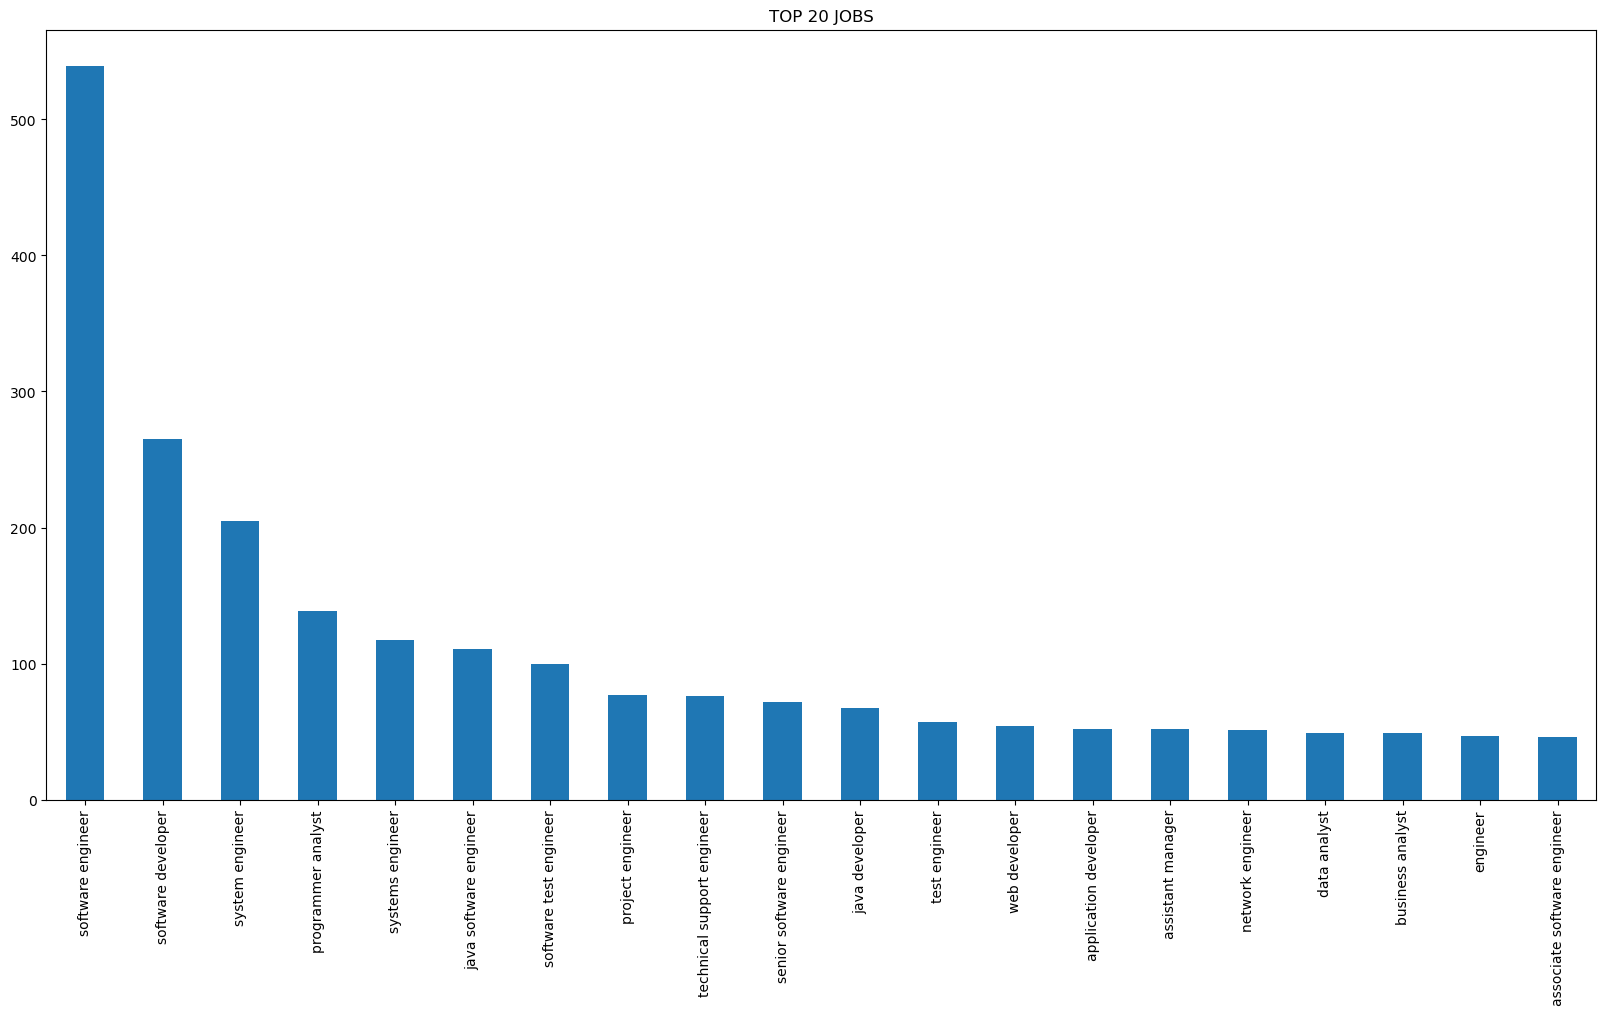

In [81]:
plt.figure(figsize=(20,10))
city=df['Designation'].value_counts()[:20].plot.bar()
plt.title('TOP 20 JOBS')
plt.show()

1 THE HIGHEST COUNT DESIGNATION IS SOFTWARE ENGINEER.

2 THIS COUNT PLOT SHOW TOP 20 JOBS DESIGNATION.

# UNI-VARIATE ANALYSIS ON EXPERIENCE

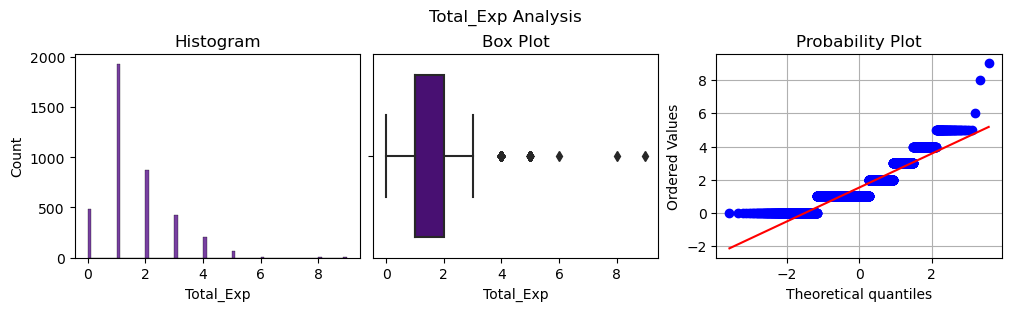

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Total_Exp Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='Total_Exp', ax=axs[0], color = 'indigo')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='Total_Exp', ax=axs[1], color = 'indigo')

stats.probplot(df['Total_Exp'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

Most of the candidates are just 0-3 years experienced as most of them are recent graduates, this can be justified by Graduation year

# UNI-VARIATE ANALYSIS ON AGE

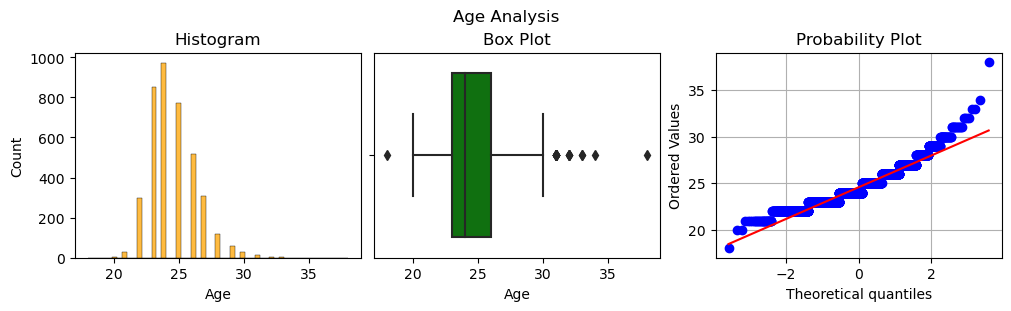

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Age Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='Age', ax=axs[0], color = 'orange')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='Age', ax=axs[1], color = 'green')

stats.probplot(df['Age'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

Young age group has captured major share among the candidates

# Bi-Variate Analysis

Numerical v/s Numerical

<Axes: xlabel='Salary', ylabel='collegeGPA'>

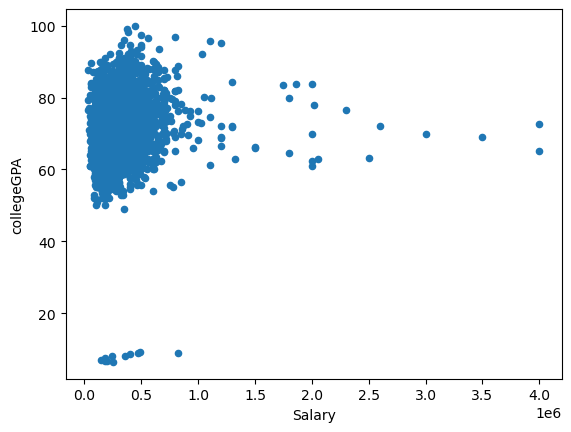

In [102]:
df.plot.scatter('Salary','collegeGPA')

In [103]:
df

Salary                  Designation    JobCity Gender  CollegeTier  \
0      420000      senior quality engineer  BANGALORE      f            2   
1      500000            assistant manager     INDORE      m            2   
2      325000             systems engineer    CHENNAI      f            2   
3     1100000     senior software engineer    GURGAON      m            1   
5      300000              system engineer  HYDERABAD      m            2   
...       ...                          ...        ...    ...          ...   
3993   280000            software engineer  NEW DELHI      m            2   
3994   100000             technical writer  HYDERABAD      f            2   
3995   320000  associate software engineer  BANGALORE      m            2   
3996   200000           software developer  BANGALORE      f            2   
3997   400000      senior systems engineer    CHENNAI      f            2   

           Degree                             Specialization  collegeGPA  \
0     B.Tech/B.E.       electronics and computer engineering     78.0000   
1     B.Tech/B.E.  electronics and communication engineering     70.0625   
2     B.Tech/B.E.                     information technology     70.0000   
3     B.Tech/B.E.       electronics and computer engineering     74.6250   
5     B.Tech/B.E.  electronics and communication engineering     76.3125   
...           ...                                        ...         ...   
3993  B.Tech/B.E.                     information technology     61.5000   
3994  B.Tech/B.E.  electronics and communication engineering     77.3125   
3995  B.Tech/B.E.       electronics and computer engineering     70.0000   
3996  B.Tech/B.E.           computer science and engineering     70.4375   
3997  B.Tech/B.E.                     information technology     68.0000   

        CollegeState  GraduationYear  ...  ElectricalEngg  TelecomEngg  \
0     Andhra Pradesh            2011  ...              -1           -1   
1     Madhya Pradesh            2012  ...              -1           -1   
2      Uttar Pradesh            2014  ...              -1           -1   
3              Delhi            2011  ...              -1           -1   
5          Karnataka            2014  ...              -1           -1   
...              ...             ...  ...             ...          ...   
3993         Haryana            2010  ...              -1           -1   
3994       Telangana            2013  ...              -1           -1   
3995          Orissa            2012  ...              -1           -1   
3996       Karnataka            2014  ...              -1           -1   
3997      Tamil Nadu            2012  ...              -1           -1   

      CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
0            -1           0.973633       0.812988      0.526855     1.354492   
1            -1          -0.733398       0.378906      1.239258    -0.107605   
2            -1           0.271729       1.710938      0.163696    -0.868164   
3            -1           0.046387       0.344727     -0.343994    -0.407715   
5            -1          -0.302734      -0.620117     -2.294922    -0.741699   
...         ...                ...            ...           ...          ...   
3993         -1          -0.108215       0.344727      0.236572     0.649902   
3994         -1          -0.302734       0.878418      0.932129     0.779785   
3995         -1          -1.576172      -1.527344     -1.504883    -1.318359   
3996         -1          -0.159058       0.045898     -0.451172    -0.361084   
3997         -1          -1.113281      -0.279297     -0.634277     1.325195   

      openess_to_experience  Total_Exp  Age  
0                 -0.445557          3   25  
1                  0.863770          2   26  
2                  0.671875          1   23  
3                 -0.919434          4   26  
5                 -0.860840          1   23  
...                     ...        ...  ...

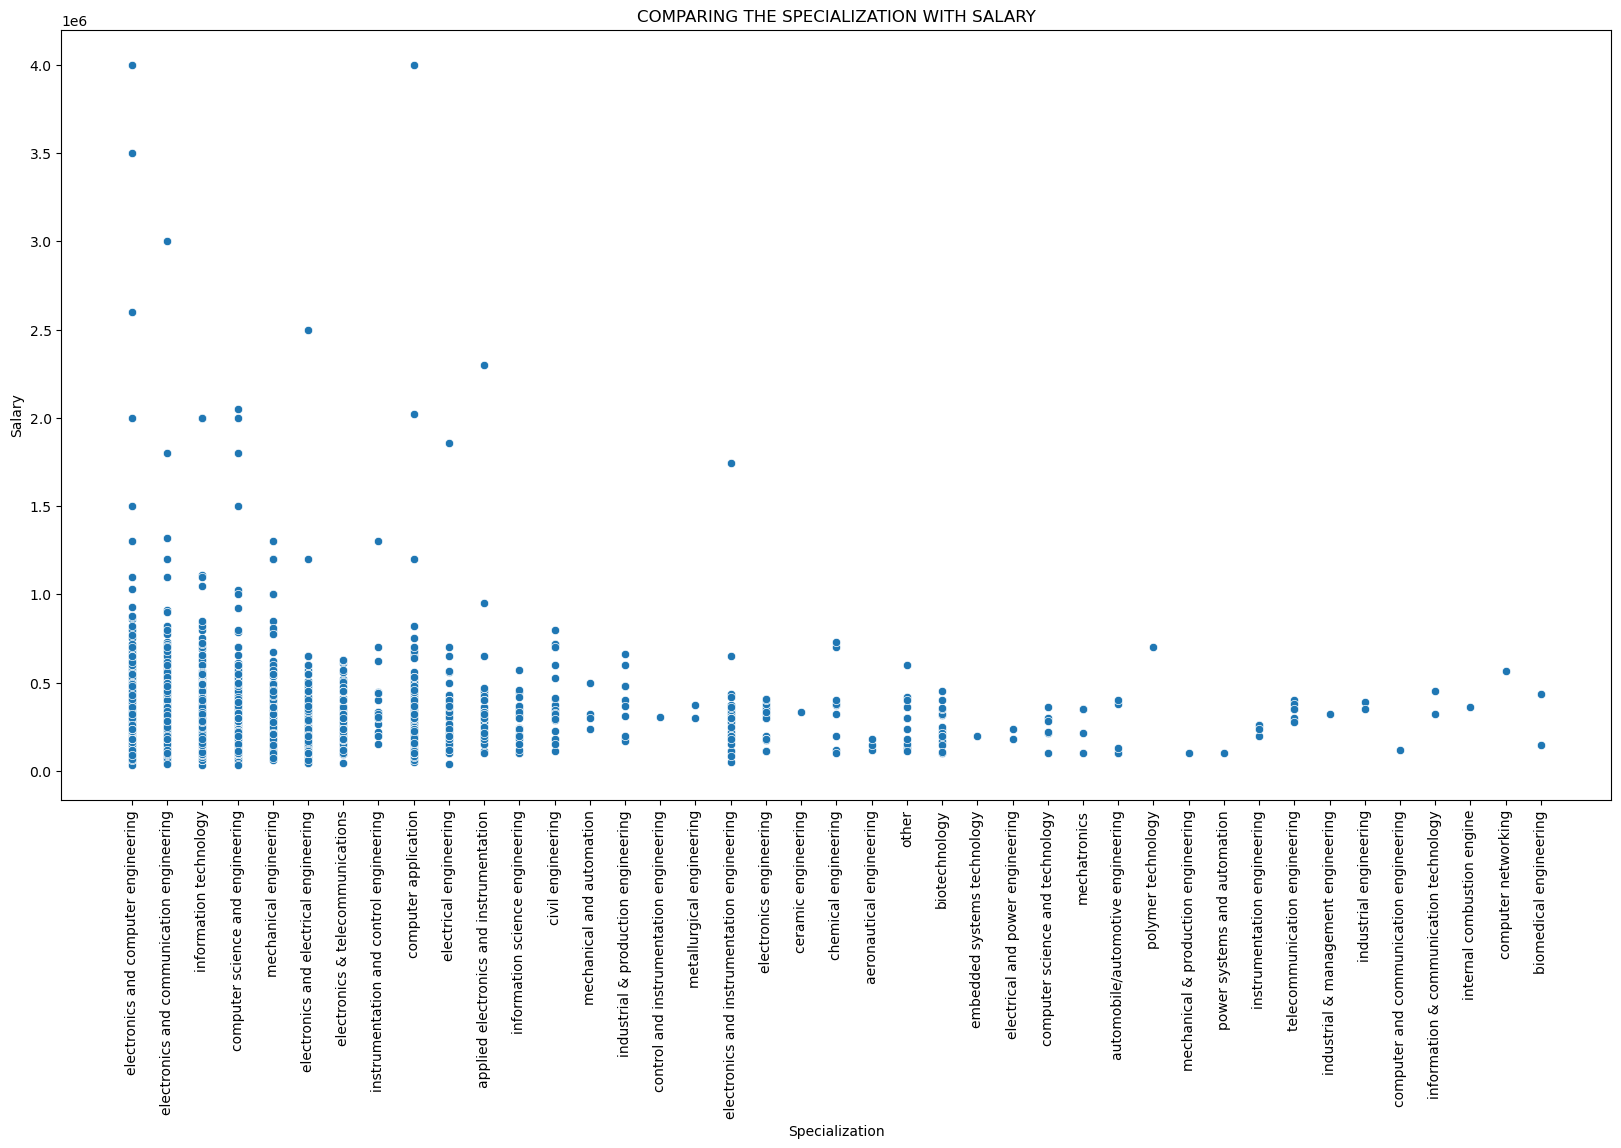

In [104]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY')
plt.show()

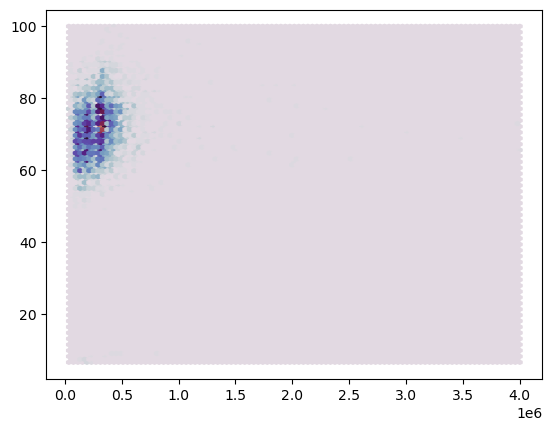

In [105]:
plt.hexbin(x = 'Salary',y = 'collegeGPA',data = df,cmap='twilight')
plt.show()

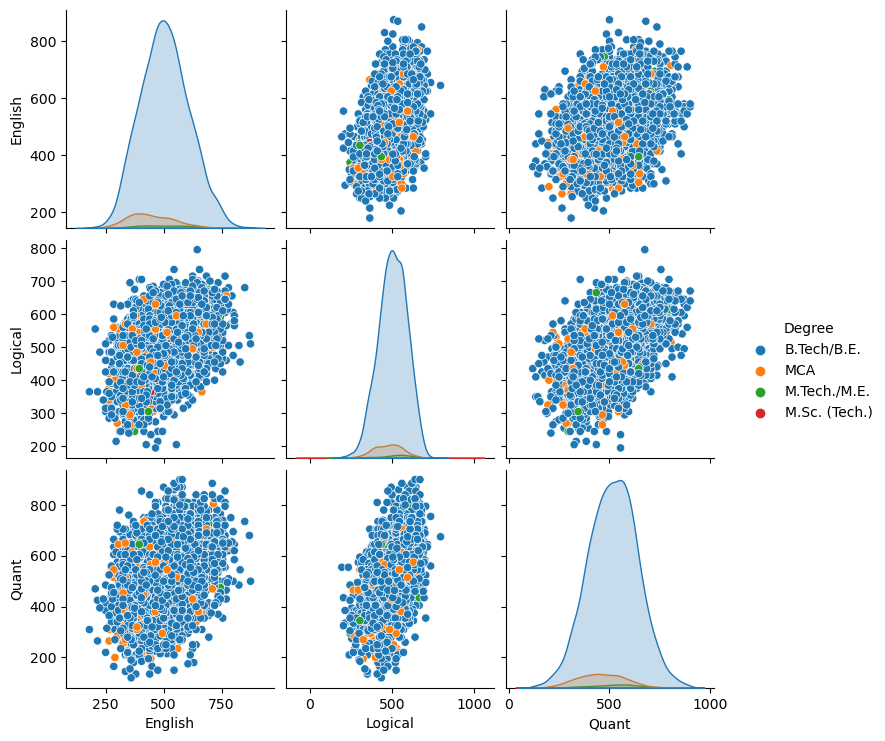

In [115]:
sns.pairplot(df,x_vars=['English','Logical','Quant'],y_vars=['English','Logical','Quant'],hue='Degree')
plt.show()

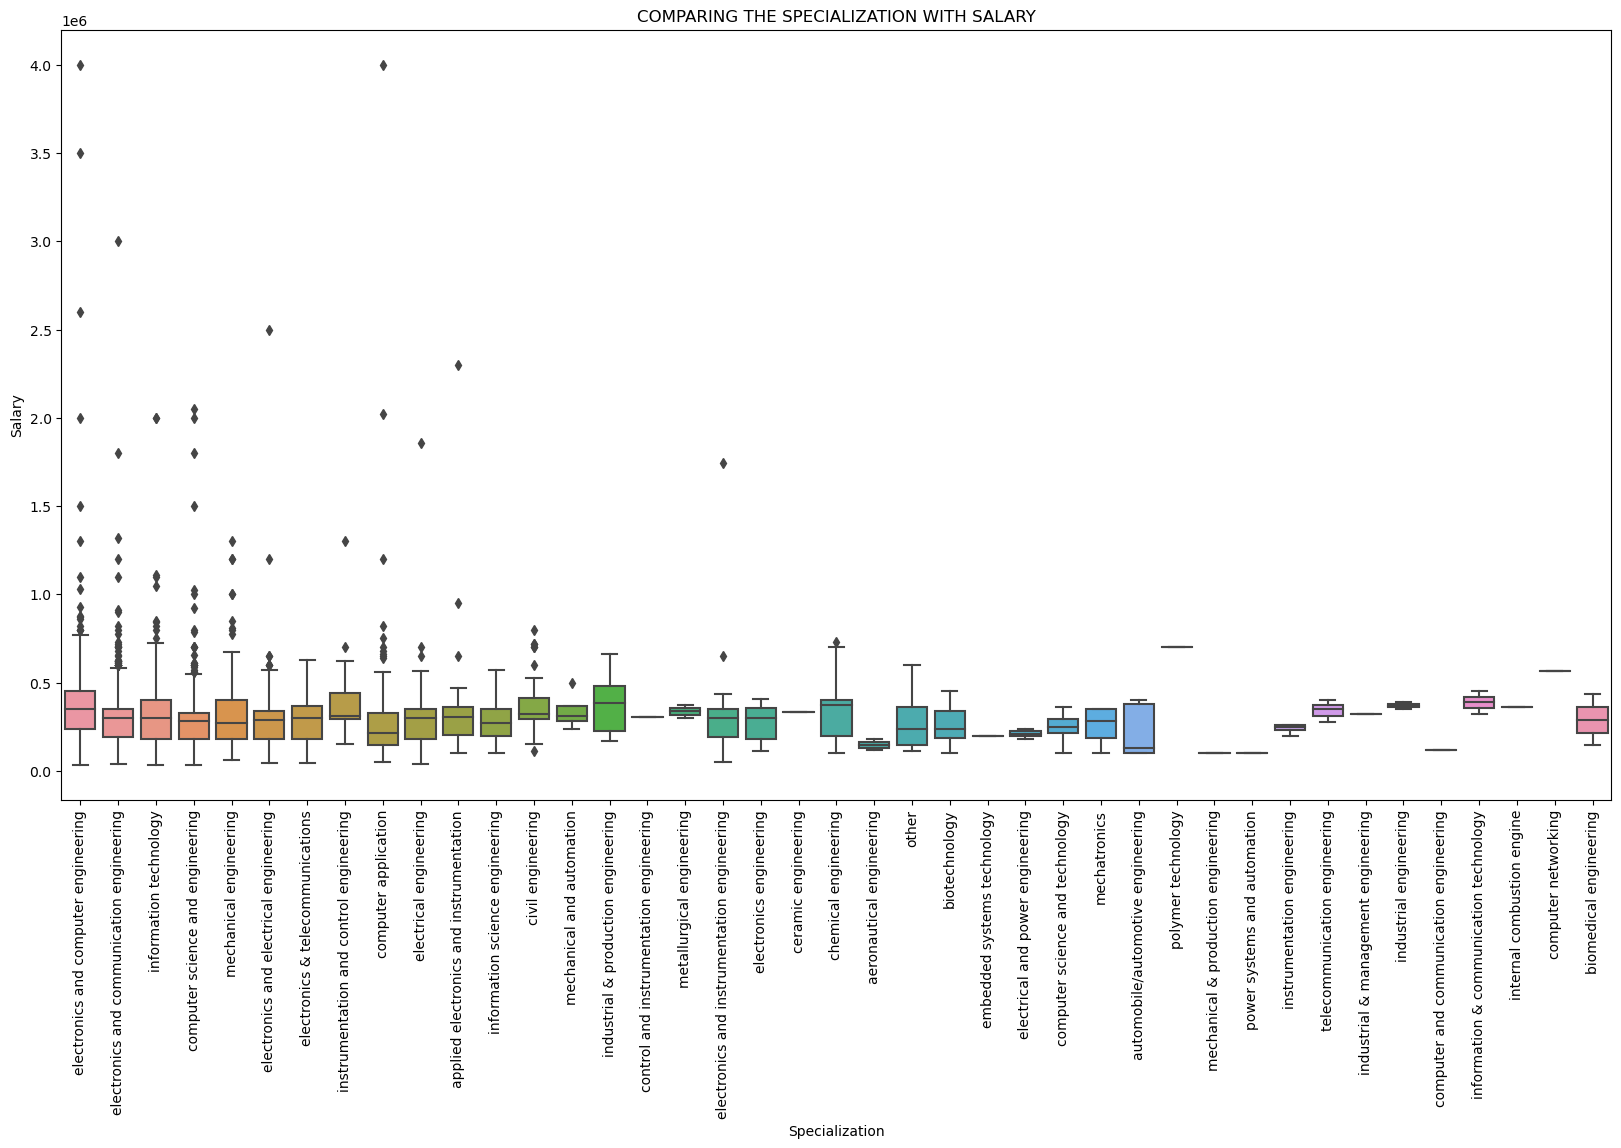

In [121]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Specialization',y='Salary',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY')
plt.show()

In [122]:
df1=df[df['Salary']> 700000]

In [123]:
df1

Salary                 Designation      JobCity Gender  CollegeTier  \
3     1100000    senior software engineer      GURGAON      m            1   
76     800000           software engineer    BANGALORE      m            2   
92    1500000       application developer    HYDERABAD      m            2   
123   1200000            engineer trainee  MAHARAJGANJ      m            2   
166   1860000              field engineer       MUMBAI      f            1   
...       ...                         ...          ...    ...          ...   
3710  1100000    senior software engineer    BANGALORE      m            2   
3823   775000  mechanical design engineer       DAMMAM      m            1   
3904   850000        operations assistant        NOIDA      m            2   
3912   730000          research scientist         PUNE      m            1   
3992   800000                     manager       RAJKOT      m            2   

            Degree                        Specialization  collegeGPA  \
3      B.Tech/B.E.  electronics and computer engineering     74.6250   
76     B.Tech/B.E.  electronics and computer engineering     87.6250   
92     B.Tech/B.E.      computer science and engineering     66.0000   
123    B.Tech/B.E.                mechanical engineering     68.6250   
166   M.Tech./M.E.                electrical engineering     83.8750   
...            ...                                   ...         ...   
3710   B.Tech/B.E.                information technology     61.1875   
3823   B.Tech/B.E.                mechanical engineering     55.0000   
3904   B.Tech/B.E.                information technology     70.0000   
3912   B.Tech/B.E.                  chemical engineering     85.8125   
3992   B.Tech/B.E.                     civil engineering     79.0000   

       CollegeState  GraduationYear  ...  ElectricalEngg  TelecomEngg  \
3             Delhi            2011  ...              -1           -1   
76        Karnataka            2012  ...              -1           -1   
92        Telangana            2013  ...              -1           -1   
123   Uttar Pradesh            2010  ...              -1           -1   
166   Uttar Pradesh            2012  ...              -1           -1   
...             ...             ...  ...             ...          ...   
3710      Karnataka            2011  ...              -1           -1   
3823    Maharashtra            2013  ...              -1           -1   
3904        Haryana            2011  ...              -1           -1   
3912      Rajasthan            2011  ...              -1           -1   
3992         Orissa            2012  ...              -1           -1   

      CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
3            -1           0.046387       0.344727     -0.343994    -0.407715   
76           -1          -0.417236       0.968750     -0.198853    -0.290283   
92           -1           0.415527       0.545410      0.932129    -0.614746   
123          -1           0.200928       1.125000      1.107422    -1.113281   
166          -1          -1.344727       0.617676     -1.468750     0.884766   
...         ...                ...            ...           ...          ...   
3710         -1          -0.880859       0.500977     -0.634277    -1.347656   
3823         -1          -0.877441      -0.120605     -0.143677    -0.234375   
3904         -1          -0.880859       0.188843     -0.198853    -0.055206   
3912         -1          -1.344727      -1.059570      0.671875     1.001953   
3992        480           0.355469      -0.903320      0.962402     0.649902   

      openess_to_experience  Total_Exp  Age  
3                 -0.919434          4   26  
76                 0.304932          3   24  
92                 0.863770          0   23  
123                0.976074          1   27  
166                0.660156          2   26  
...                     ...        ...  ...  
3710              -0.603516          4   26  

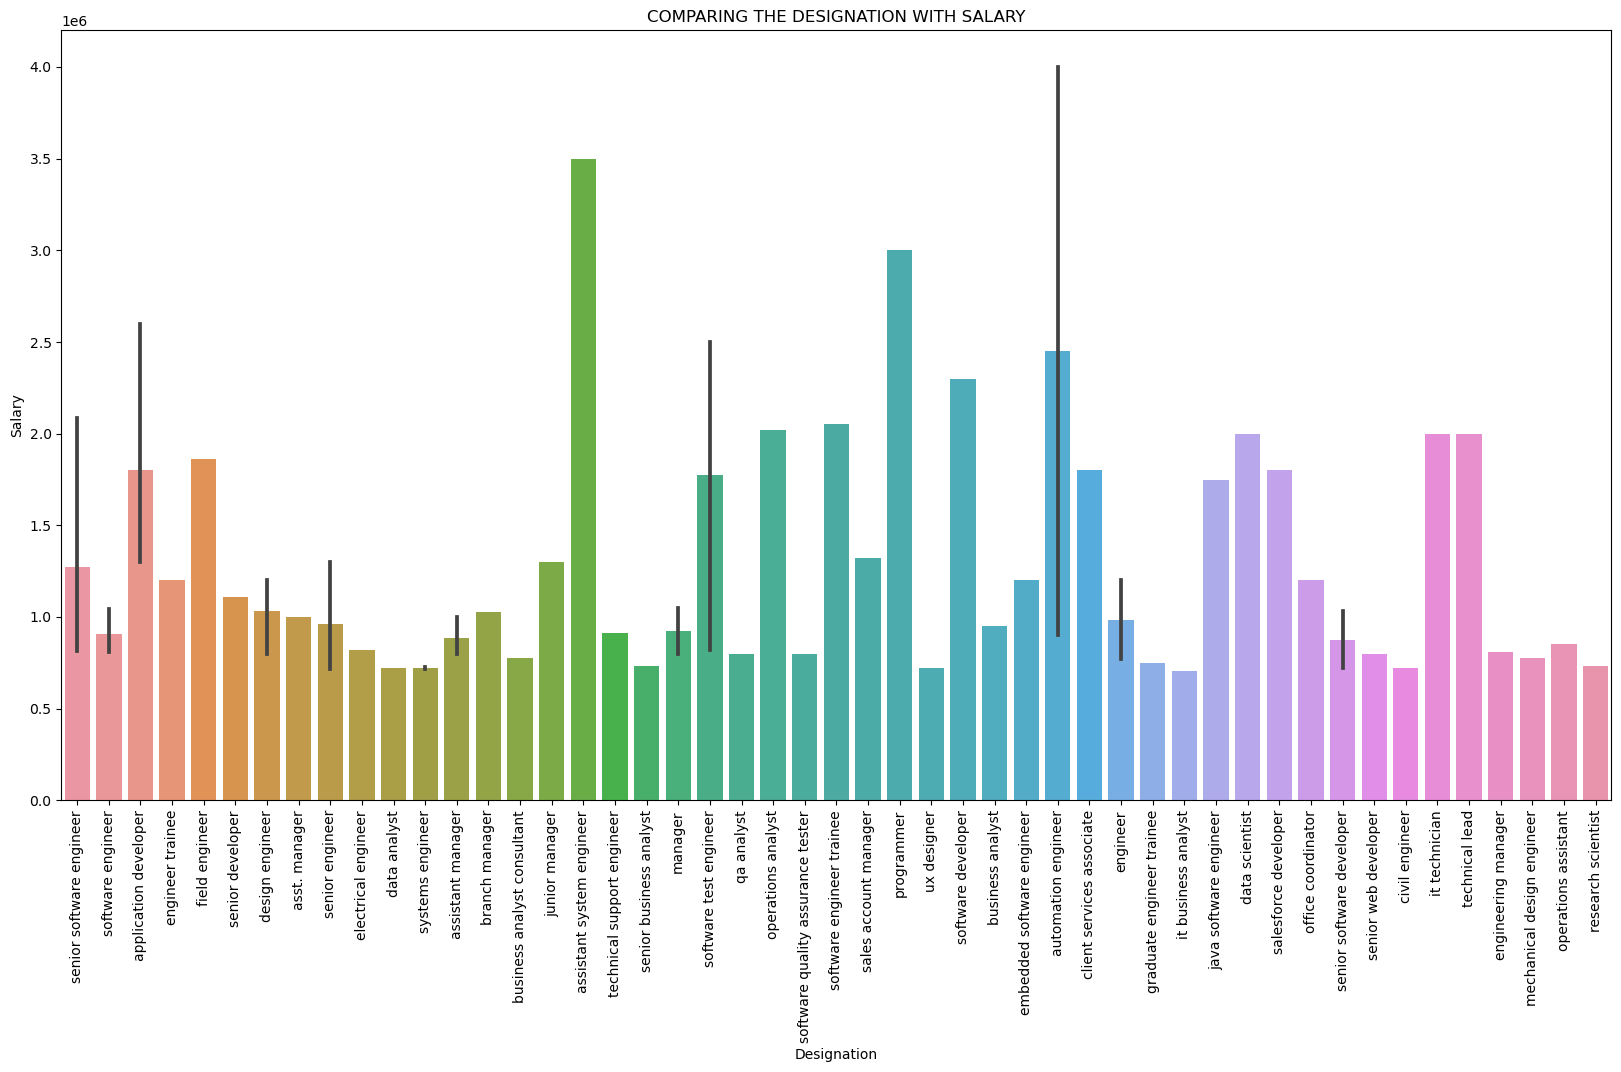

In [125]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',data=df1)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE DESIGNATION WITH SALARY')
plt.show()

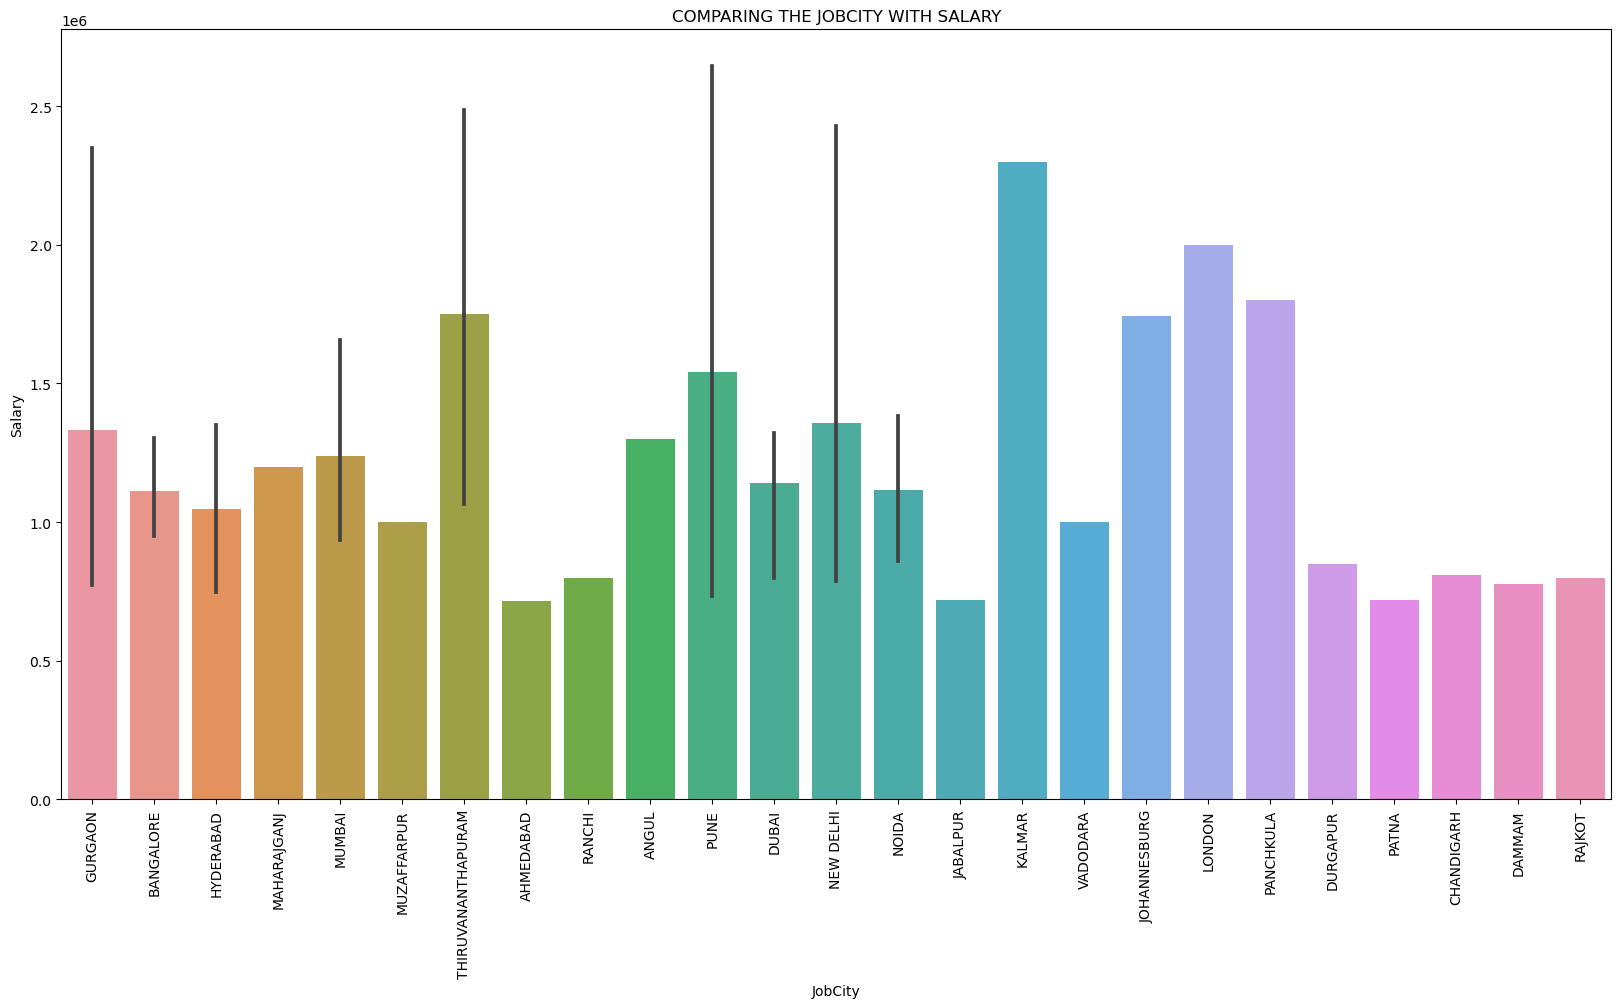

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x='JobCity',y='Salary',data=df1)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE JOBCITY WITH SALARY')
plt.show()

# MULTI-VARIANT

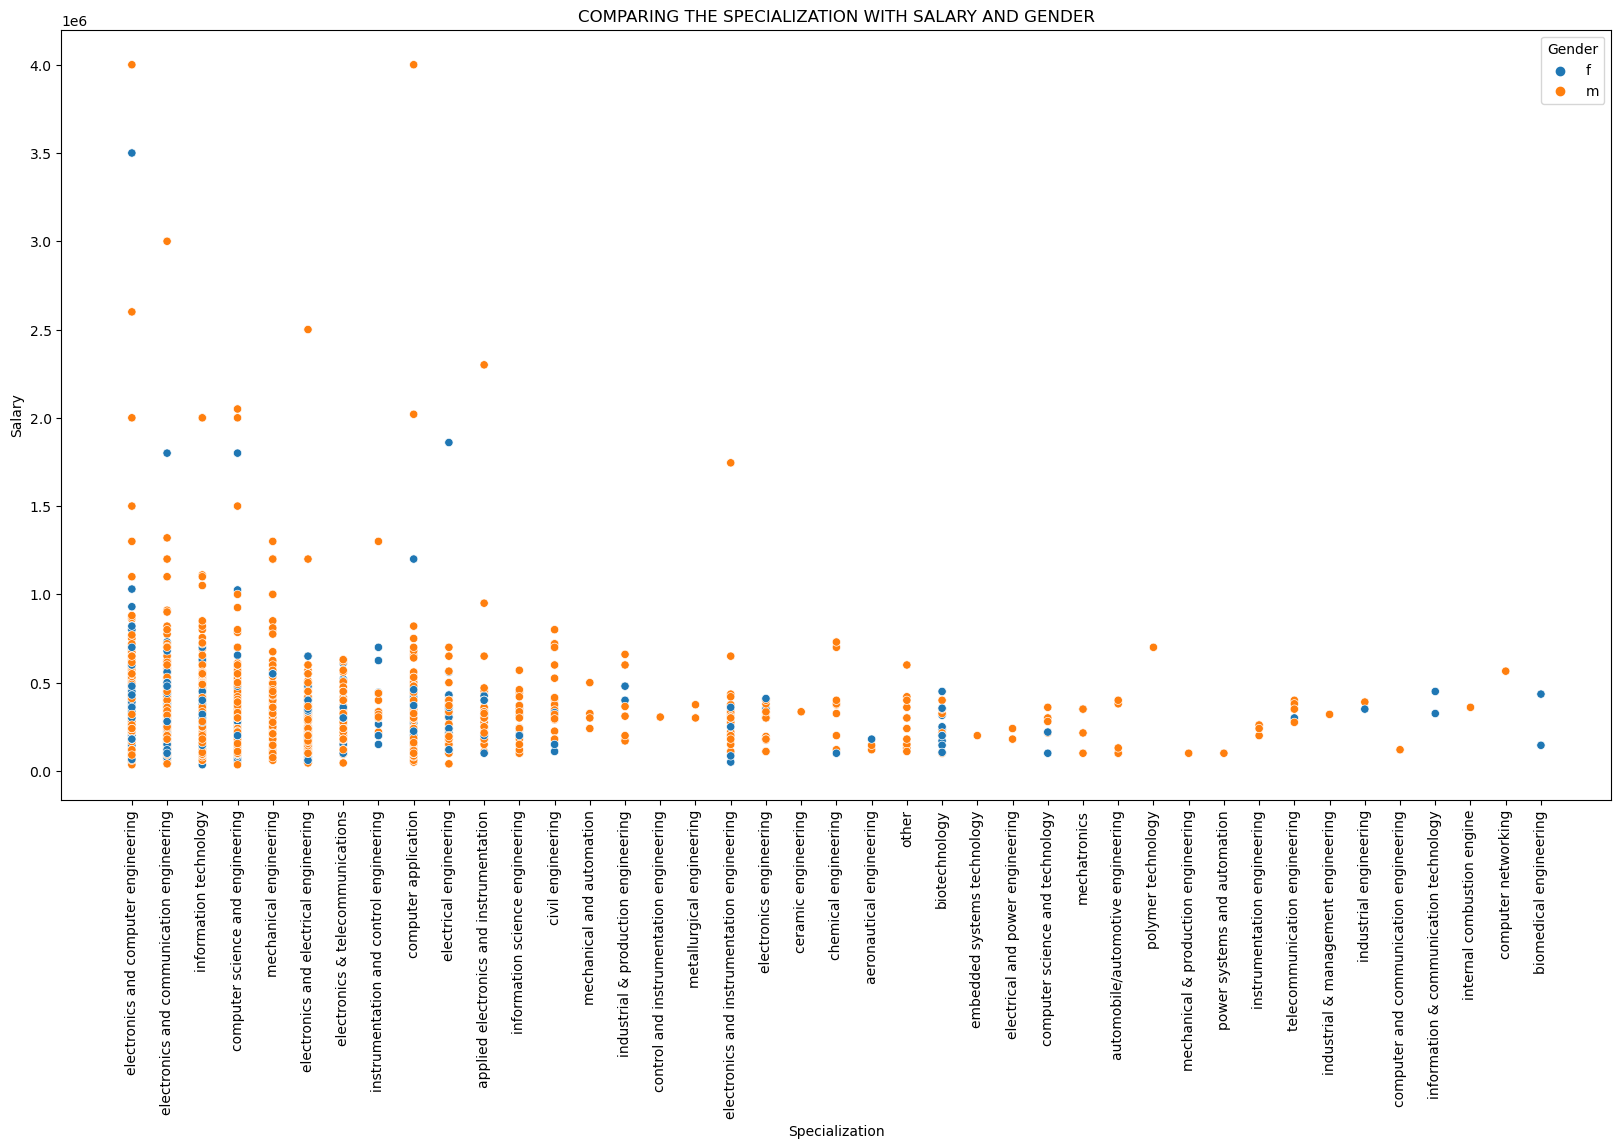

In [137]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=df,hue='Gender')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY AND GENDER')
plt.show()

1 COMPUTER ENGINEERING AND COMPUTER APPLICATION ARE GETTING HIGH SALARIES.

2 IN ALL OF THE SPECIALIZATION GENDERS ARE MOSTLY MALE.

3 COMPUTER ENGINNERING , ELECTRONICS AND COMMUNICATION, INFORMATION TECHNOLOGY, COMPUTER SCIENCE ENGINEERING ARE MORE.

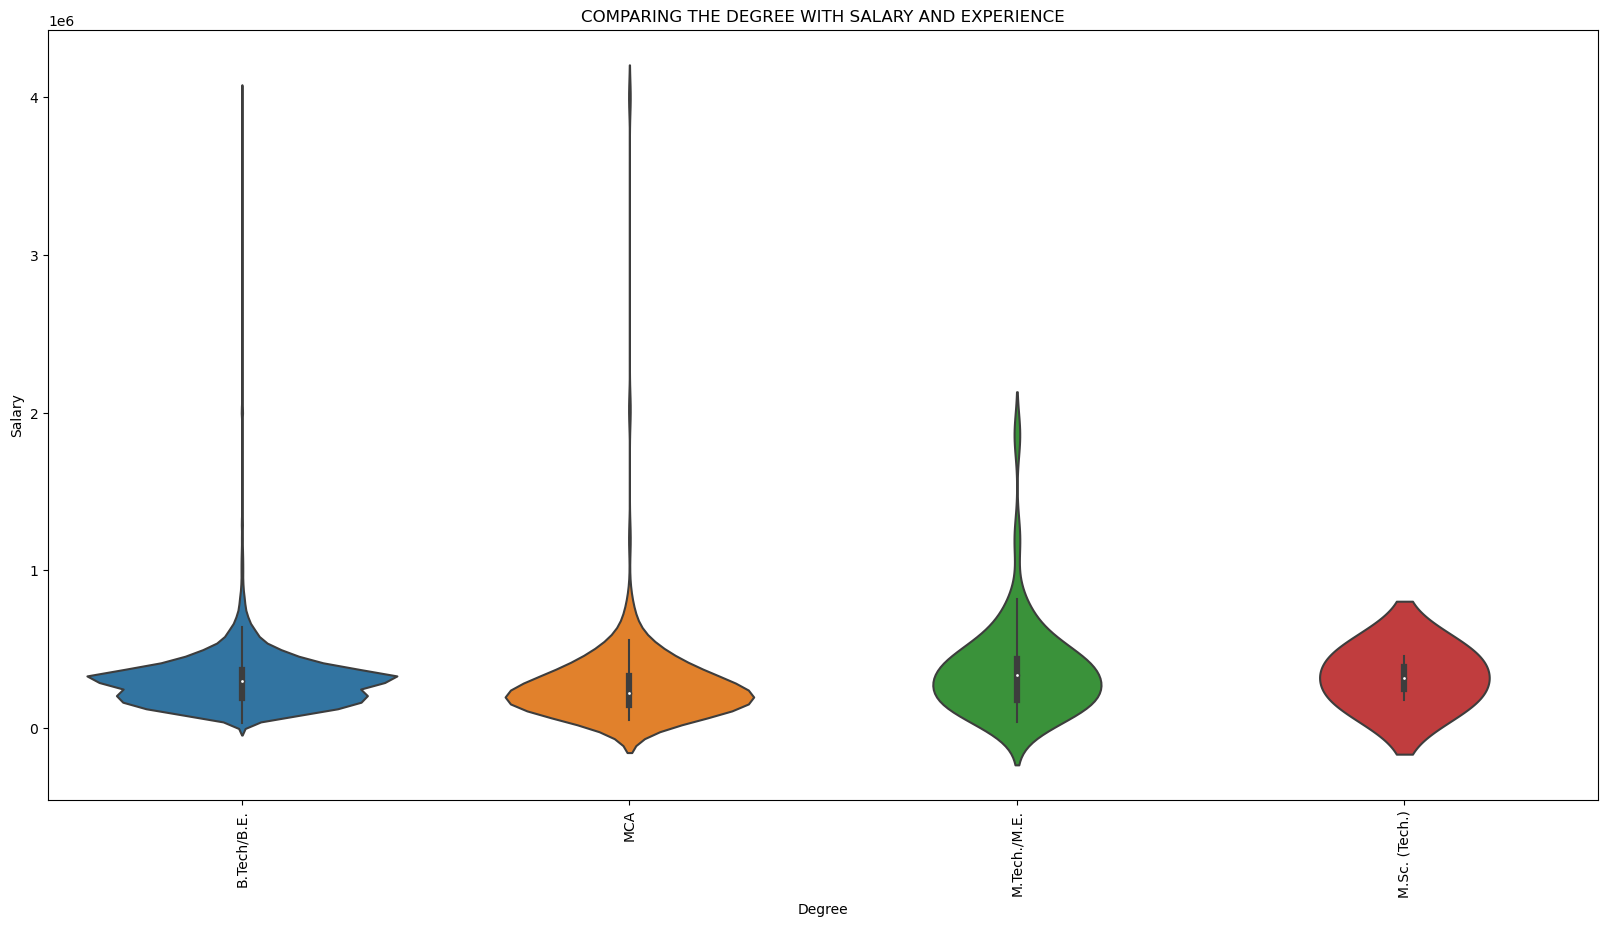

In [138]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Degree',y='Salary',data=df,style='EXPERIENCE')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE DEGREE WITH SALARY AND EXPERIENCE')
plt.show()

1 IN B.TECH\B.E EXPERIENCE AND FRESHERS ARE MORE.

2 IN M.SC EXPERIENCE AND FRESHERS ARE LESS.

3 FOR B.TECH\B.E AND MCA ARE GETTING HIGH SALARIES.

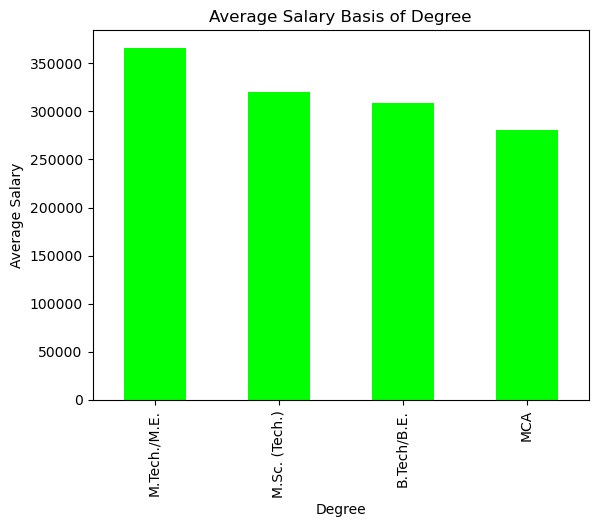

In [152]:
df.groupby('Degree')['Salary'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'lime')
plt.ylabel("Average Salary")
plt.xlabel("Degree")
plt.title("Average Salary Basis of Degree")
plt.show()

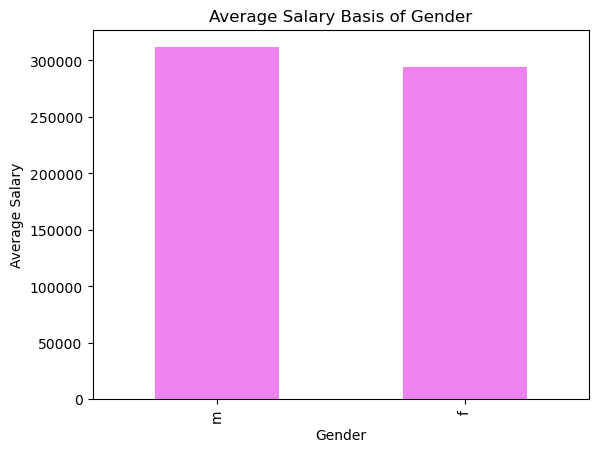

In [151]:
df.groupby('Gender')['Salary'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'violet')
plt.ylabel("Average Salary")
plt.xlabel("Gender")
plt.title("Average Salary Basis of Gender")
plt.show()

# PROBLEM STATEMENT

In [145]:
analyst= df[df.Designation=='business analyst']
analyst

Salary       Designation             JobCity Gender  CollegeTier  \
100   300000  business analyst           BANGALORE      m            2   
269   350000  business analyst           BANGALORE      f            2   
284   305000  business analyst  THIRUVANANTHAPURAM      m            2   
339   105000  business analyst              JAIPUR      f            2   
435   500000  business analyst             GURGAON      m            2   
492   525000  business analyst               NOIDA      m            2   
556   320000  business analyst           BANGALORE      m            2   
667   450000  business analyst  THIRUVANANTHAPURAM      f            1   
684   160000  business analyst               NOIDA      m            2   
739   210000  business analyst              JAIPUR      f            2   
858   105000  business analyst           HYDERABAD      m            2   
872   195000  business analyst  THIRUVANANTHAPURAM      m            2   
1026  300000  business analyst             GURGAON      f            2   
1074  305000  business analyst                PUNE      m            1   
1101  240000  business analyst               NOIDA      m            2   
1116  100000  business analyst              JAIPUR      f            2   
1118  380000  business analyst  THIRUVANANTHAPURAM      m            2   
1218  150000  business analyst              JAIPUR      m            2   
1278  360000  business analyst           BANGALORE      m            2   
1516  200000  business analyst           NEW DELHI      f            2   
1534  420000  business analyst               NOIDA      f            1   
1586  125000  business analyst            DEHRADUN      m            2   
1621  500000  business analyst               NOIDA      m            1   
1732  390000  business analyst               NOIDA      m            2   
1769  325000  business analyst           BANGALORE      m            2   
1833  180000  business analyst           HYDERABAD      f            2   
1850  400000  business analyst           HYDERABAD      m            2   
1881  500000  business analyst             GURGAON      m            1   
2093  950000  business analyst               NOIDA      m            2   
2098  325000  business analyst           NEW DELHI      f            1   
2257  600000  business analyst           HYDERABAD      m            2   
2326  300000  business analyst           BANGALORE      f            2   
2558  600000  business analyst           BANGALORE      f            2   
2571  330000  business analyst           BANGALORE      f            2   
2640  700000  business analyst           BANGALORE      m            2   
2835  325000  business analyst               NOIDA      f            2   
2923  300000  business analyst             GURGAON      m            2   
2988  500000  business analyst             GURGAON      m            1   
3092  200000  business analyst           NEW DELHI      m            2   
3150  145000  business analyst           BANGALORE      f            2   
3177  340000  business analyst               NOIDA      m            2   
3198  180000  business analyst             GURGAON      m            2   
3243  300000  business analyst             GURGAON      m            1   
3331  420000  business analyst               NOIDA      f            2   
3365  360000  business analyst           HYDERABAD      m            2   
3369  360000  business analyst             GURGAON      f            2   
3556  100000  business analyst              JAIPUR      f            2   
3752  450000  business analyst           BANGALORE      m            2   
3886  300000  business analyst           HYDERABAD      f            2   

           Degree                             Specialization  collegeGPA  \
100   B.Tech/B.E.                     information technology     80.0000   
269   B.Tech/B.E.           computer science and engineering     78.3750   
284   B.Tech/B.E.           computer science and engineering     71.5000   
3

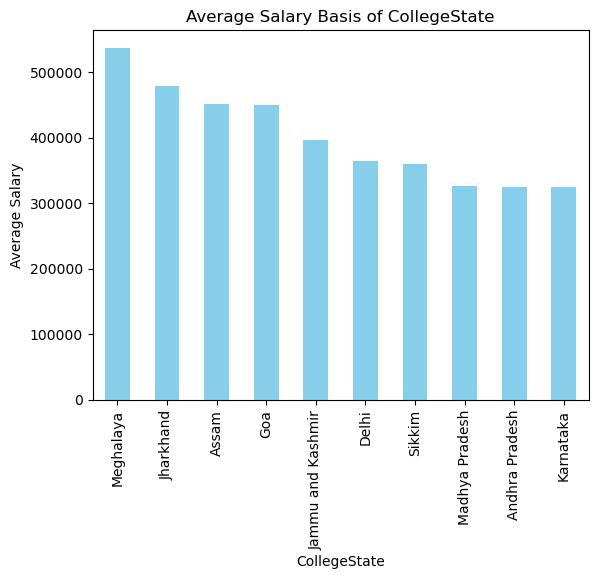

In [150]:
df.groupby('CollegeState')['Salary'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar', color = 'skyblue')
plt.ylabel("Average Salary")
plt.xlabel("CollegeState")
plt.title("Average Salary Basis of CollegeState")
plt.show()

In [148]:
job = df[(df['Designation'] == 'system engineer') & (df['Salary'] > 450000)]

In [149]:
job

Salary      Designation             JobCity Gender  CollegeTier  \
66    455000  system engineer           BANGALORE      m            2   
504   460000  system engineer                PUNE      m            2   
582   460000  system engineer           BANGALORE      m            2   
742   490000  system engineer              MUMBAI      m            2   
871   465000  system engineer              MUMBAI      f            2   
895   480000  system engineer             KOLKATA      m            2   
1662  470000  system engineer           BANGALORE      m            2   
1890  470000  system engineer             KOLKATA      m            2   
2059  495000  system engineer  THIRUVANANTHAPURAM      m            1   
2287  470000  system engineer             GURGAON      m            2   
2386  505000  system engineer                PUNE      m            2   
2429  460000  system engineer             GURGAON      m            2   
2595  470000  system engineer           HYDERABAD      m            2   
2621  570000  system engineer             CHENNAI      m            2   
2678  480000  system engineer              MUMBAI      m            2   
2715  500000  system engineer           HYDERABAD      m            2   
2891  500000  system engineer             KOLKATA      m            2   
3179  500000  system engineer           NEW DELHI      f            2   
3392  500000  system engineer                PUNE      m            1   
3468  520000  system engineer               NOIDA      m            2   
3538  460000  system engineer              MUMBAI      m            2   
3563  460000  system engineer             GURGAON      m            2   
3592  470000  system engineer                PUNE      m            2   
3764  470000  system engineer               NOIDA      m            2   
3805  500000  system engineer           BANGALORE      m            2   
3833  500000  system engineer              MUMBAI      m            2   
3933  490000  system engineer             CHENNAI      m            2   

           Degree                             Specialization  collegeGPA  \
66    B.Tech/B.E.  electronics and communication engineering     76.1250   
504   B.Tech/B.E.  electronics and communication engineering     81.0000   
582   B.Tech/B.E.       electronics and computer engineering     79.6250   
742   B.Tech/B.E.       electronics and computer engineering     80.2500   
871   B.Tech/B.E.       electronics and computer engineering     73.0000   
895   B.Tech/B.E.  electronics and communication engineering     80.0000   
1662  B.Tech/B.E.                     information technology     81.3750   
1890  B.Tech/B.E.                     information technology     70.0000   
2059  B.Tech/B.E.       electronics and computer engineering     88.1250   
2287  B.Tech/B.E.     electronics and electrical engineering     69.8750   
2386  B.Tech/B.E.       electronics and computer engineering     69.1250   
2429  B.Tech/B.E.           computer science and engineering     74.4375   
2595  B.Tech/B.E.       electronics and computer engineering     80.0000   
2621  B.Tech/B.E.       electronics and computer engineering     62.0000   
2678  B.Tech/B.E.       electronics and computer engineering     76.3750   
2715  B.Tech/B.E.     electronics and electrical engineering     71.6875   
2891  B.Tech/B.E.       electronics and computer engineering     78.6875   
3179  B.Tech/B.E.       electronics and computer engineering     79.6875   
3392  B.Tech/B.E.  electronics and communication engineering     84.3750   
3468  B.Tech/B.E.       electronics and computer engineering     65.0000   
3538  B.Tech/B.E.                     mechanical engineering     77.0000   
3563  B.Tech/B.E.                     information technology     67.0000   
3592  B.Tech/B.E.       electronics and computer engineering     70.0000   
3764  B.Tech/B.E.                     information technology     61.0000   
3805  B.Tech/B.E.       electronics and computer engineering 

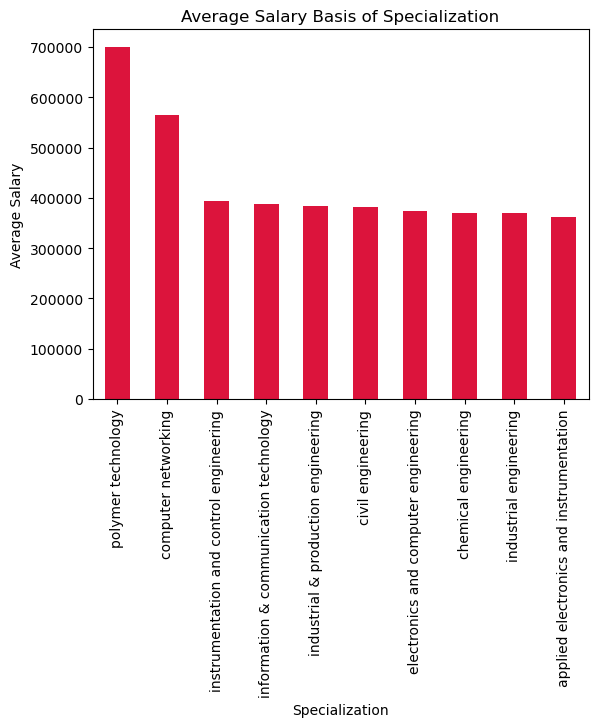

In [153]:
df.groupby('Specialization')['Salary'].mean().sort_values(ascending=False).head(10)

plt.ylabel("Average Salary")
plt.xlabel("Specialization")
plt.title("Average Salary Basis of Specialization")
plt.show()

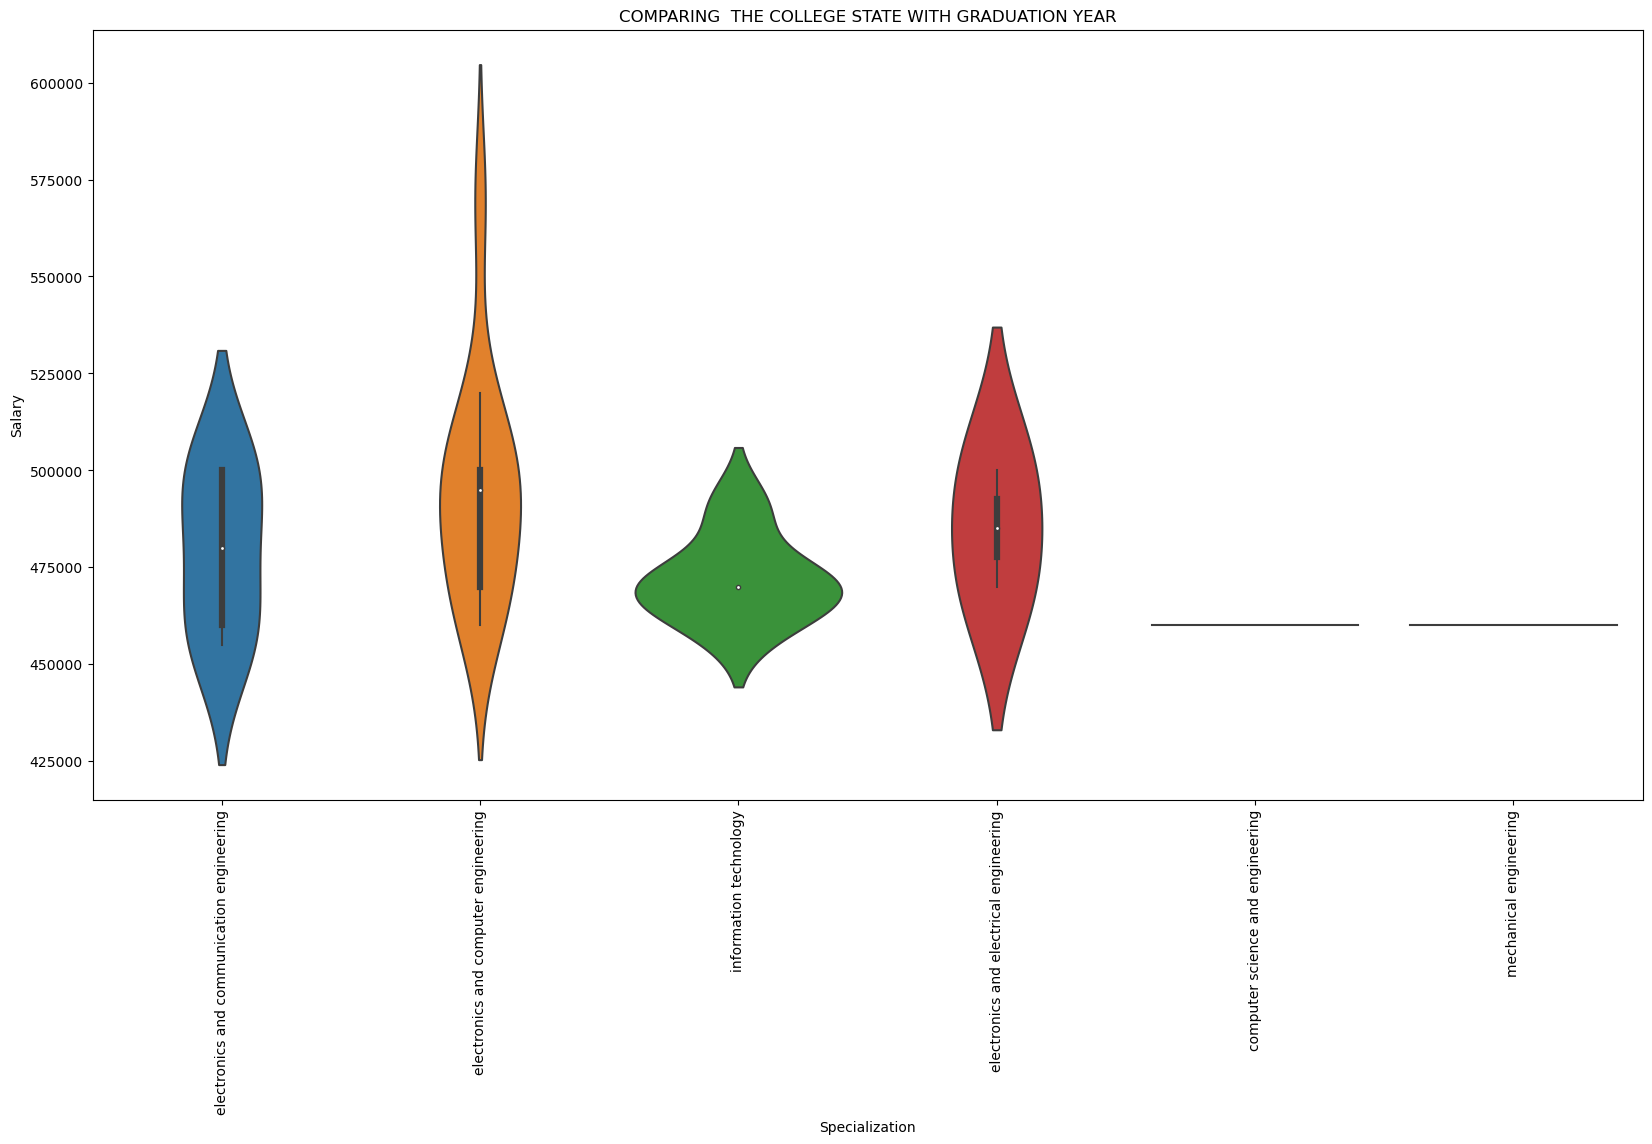

In [158]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Specialization',y='Salary',data=job,style='EXPERIENCE')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING  THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [159]:
data = df[df.Designation=='data analyst']
data

Salary   Designation             JobCity Gender  CollegeTier  \
74    120000  data analyst              INDORE      f            2   
153   180000  data analyst           HYDERABAD      m            2   
302   105000  data analyst                PUNE      f            2   
402   215000  data analyst           HYDERABAD      m            2   
451   170000  data analyst           HYDERABAD      m            2   
493   720000  data analyst             GURGAON      m            1   
636   180000  data analyst             GURGAON      m            2   
643   180000  data analyst             GURGAON      m            2   
738   290000  data analyst       VISAKHAPATNAM      m            2   
875   200000  data analyst               NOIDA      f            2   
981   175000  data analyst           HYDERABAD      f            2   
1086  210000  data analyst           HYDERABAD      m            2   
1131  150000  data analyst               NOIDA      f            2   
1251  200000  data analyst             GURGAON      m            2   
1266  180000  data analyst               NOIDA      m            2   
1295  200000  data analyst           HYDERABAD      m            2   
1338  150000  data analyst             CHENNAI      m            2   
1350  300000  data analyst                PUNE      m            2   
1352  280000  data analyst               NOIDA      f            2   
1397  180000  data analyst             GURGAON      f            2   
1471  145000  data analyst           HYDERABAD      f            2   
1695  180000  data analyst             GURGAON      m            1   
1711  625000  data analyst  THIRUVANANTHAPURAM      m            1   
1734  155000  data analyst              MYSORE      m            2   
1754  200000  data analyst             CHENNAI      f            2   
2024  200000  data analyst           HYDERABAD      f            2   
2056  145000  data analyst           BANGALORE      m            2   
2073  260000  data analyst           BANGALORE      m            2   
2144  220000  data analyst           BANGALORE      m            2   
2204  200000  data analyst           BANGALORE      m            2   
2231  300000  data analyst           BANGALORE      m            2   
2272  420000  data analyst  THIRUVANANTHAPURAM      m            2   
2364  265000  data analyst             GURGAON      m            2   
2422  130000  data analyst  THIRUVANANTHAPURAM      m            2   
2471  325000  data analyst                PUNE      f            2   
2569  220000  data analyst          COIMBATORE      m            2   
2737  310000  data analyst           HYDERABAD      f            2   
2832  180000  data analyst               NOIDA      m            2   
2845  170000  data analyst           HYDERABAD      f            2   
2970  180000  data analyst  THIRUVANANTHAPURAM      m            2   
2989  120000  data analyst           HYDERABAD      m            2   
3050  260000  data analyst             GURGAON      m            2   
3187  345000  data analyst             CHENNAI      m            2   
3535  320000  data analyst  THIRUVANANTHAPURAM      f            2   
3540  180000  data analyst  THIRUVANANTHAPURAM      f            2   
3633  280000  data analyst  THIRUVANANTHAPURAM      m            2   
3885  180000  data analyst           HYDERABAD      m            2   
3921  300000  data analyst           BANGALORE      m            2   
3988  200000  data analyst           BANGALORE      f            2   

           Degree                             Specialization  collegeGPA  \
74    B.Tech/B.E.           computer science and engineering    75.00000   
153   B.Tech/B.E.           electronics & telecommunications    70.56250   
302   B.Tech/B.E.       electronics and computer engineering    66.00000   
402   B.Tech/B.E.       electronics and computer engineering    62.71875   
451   B.Tech/B.E.  electronics and communication engineering    75.18750   
493   B.Tech/B.E.                          civil 

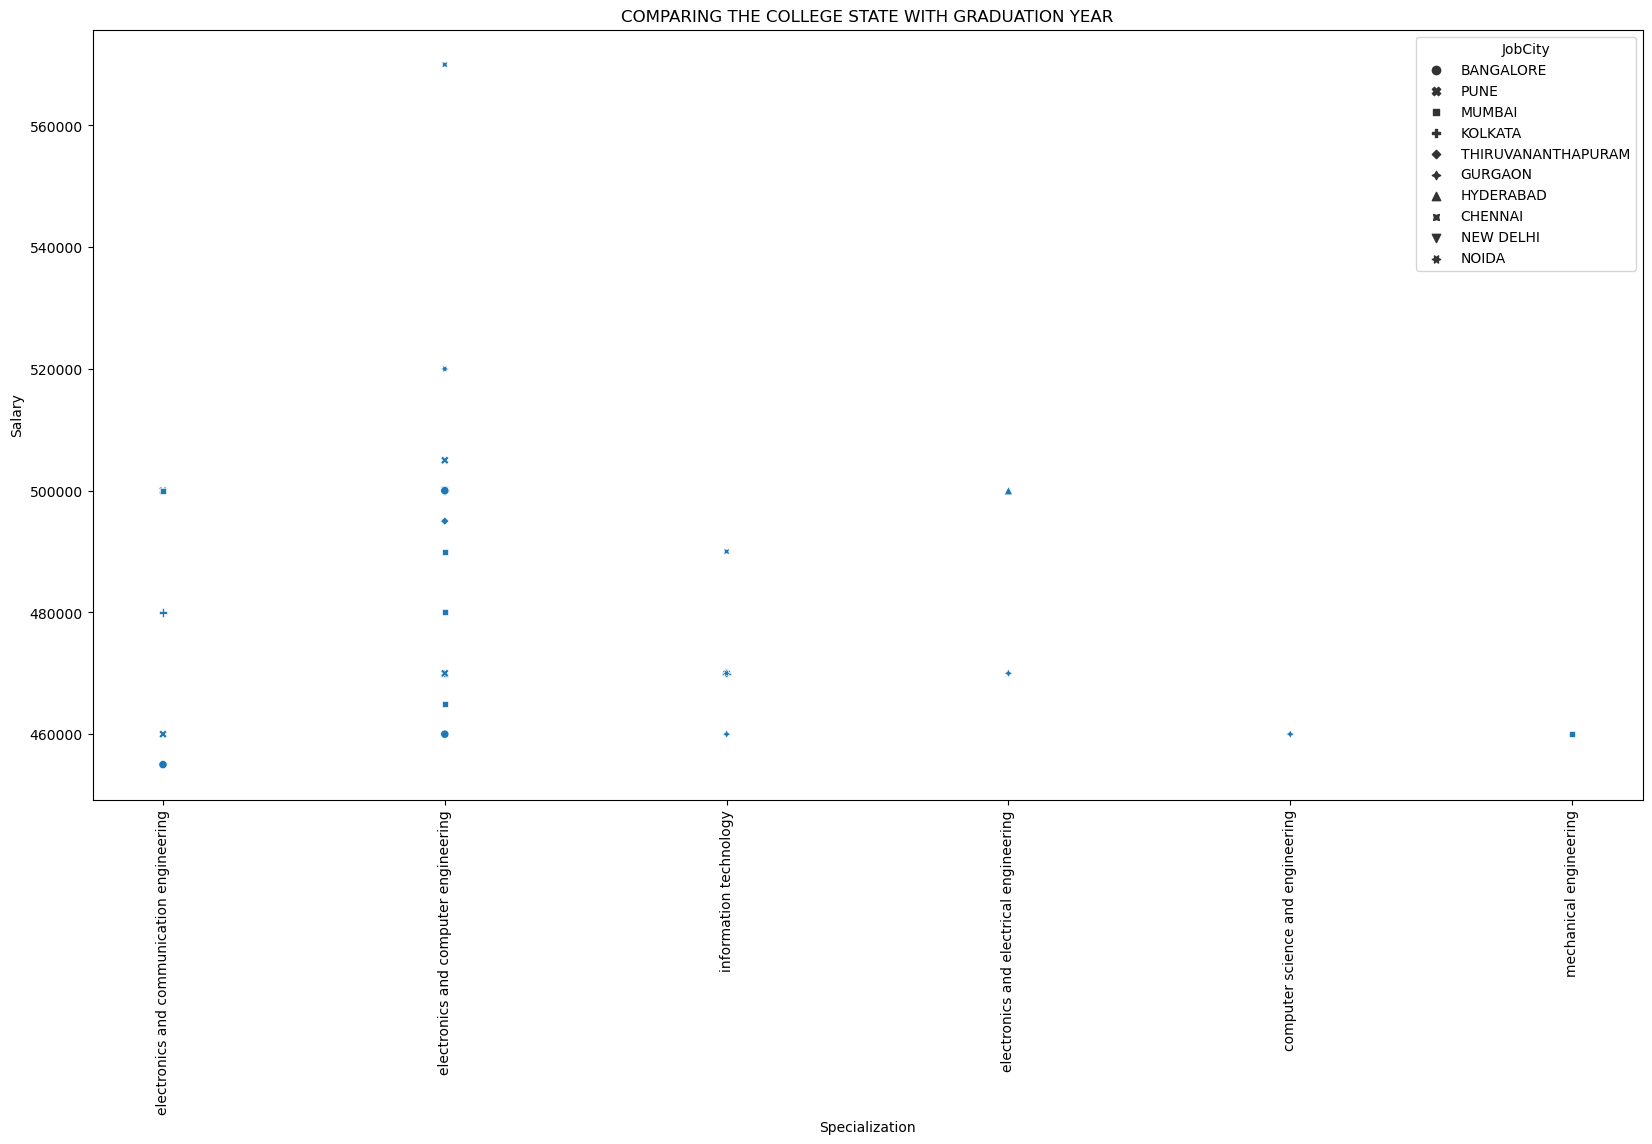

In [160]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=job,style='JobCity')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [163]:
df

Salary                  Designation    JobCity Gender  CollegeTier  \
0      420000      senior quality engineer  BANGALORE      f            2   
1      500000            assistant manager     INDORE      m            2   
2      325000             systems engineer    CHENNAI      f            2   
3     1100000     senior software engineer    GURGAON      m            1   
5      300000              system engineer  HYDERABAD      m            2   
...       ...                          ...        ...    ...          ...   
3993   280000            software engineer  NEW DELHI      m            2   
3994   100000             technical writer  HYDERABAD      f            2   
3995   320000  associate software engineer  BANGALORE      m            2   
3996   200000           software developer  BANGALORE      f            2   
3997   400000      senior systems engineer    CHENNAI      f            2   

           Degree                             Specialization  collegeGPA  \
0     B.Tech/B.E.       electronics and computer engineering     78.0000   
1     B.Tech/B.E.  electronics and communication engineering     70.0625   
2     B.Tech/B.E.                     information technology     70.0000   
3     B.Tech/B.E.       electronics and computer engineering     74.6250   
5     B.Tech/B.E.  electronics and communication engineering     76.3125   
...           ...                                        ...         ...   
3993  B.Tech/B.E.                     information technology     61.5000   
3994  B.Tech/B.E.  electronics and communication engineering     77.3125   
3995  B.Tech/B.E.       electronics and computer engineering     70.0000   
3996  B.Tech/B.E.           computer science and engineering     70.4375   
3997  B.Tech/B.E.                     information technology     68.0000   

        CollegeState  GraduationYear  ...  ElectricalEngg  TelecomEngg  \
0     Andhra Pradesh            2011  ...              -1           -1   
1     Madhya Pradesh            2012  ...              -1           -1   
2      Uttar Pradesh            2014  ...              -1           -1   
3              Delhi            2011  ...              -1           -1   
5          Karnataka            2014  ...              -1           -1   
...              ...             ...  ...             ...          ...   
3993         Haryana            2010  ...              -1           -1   
3994       Telangana            2013  ...              -1           -1   
3995          Orissa            2012  ...              -1           -1   
3996       Karnataka            2014  ...              -1           -1   
3997      Tamil Nadu            2012  ...              -1           -1   

      CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
0            -1           0.973633       0.812988      0.526855     1.354492   
1            -1          -0.733398       0.378906      1.239258    -0.107605   
2            -1           0.271729       1.710938      0.163696    -0.868164   
3            -1           0.046387       0.344727     -0.343994    -0.407715   
5            -1          -0.302734      -0.620117     -2.294922    -0.741699   
...         ...                ...            ...           ...          ...   
3993         -1          -0.108215       0.344727      0.236572     0.649902   
3994         -1          -0.302734       0.878418      0.932129     0.779785   
3995         -1          -1.576172      -1.527344     -1.504883    -1.318359   
3996         -1          -0.159058       0.045898     -0.451172    -0.361084   
3997         -1          -1.113281      -0.279297     -0.634277     1.325195   

      openess_to_experience  Total_Exp  Age  
0                 -0.445557          3   25  
1                  0.863770          2   26  
2                  0.671875          1   23  
3                 -0.919434          4   26  
5                 -0.860840          1   23  
...                     ...        ...  ...